In [590]:
import torch
import random, csv
import numpy as np
from torch.utils.data import Dataset
from sklearn import preprocessing
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [591]:
import pandas as pd

# 读取CSV文件
data = pd.read_csv('E:/代码库/正式项目/Wimbledon_featured_matches.csv')

# 输出前5行数据
print(data.head())

              match_id         player1        player2 elapsed_time  set_no  \
0  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry      0:00:00       1   
1  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry      0:00:38       1   
2  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry      0:01:01       1   
3  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry      0:01:31       1   
4  2023-wimbledon-1301  Carlos Alcaraz  Nicolas Jarry      0:02:21       1   

   game_no  point_no  p1_sets  p2_sets  p1_games  ...  p2_break_pt_won  \
0        1         1        0        0         0  ...                0   
1        1         2        0        0         0  ...                0   
2        1         3        0        0         0  ...                0   
3        1         4        0        0         0  ...                0   
4        1         5        0        0         0  ...                0   

  p1_break_pt_missed p2_break_pt_missed  p1_distance_run  p2_distance_run  \
0        

In [592]:
data['moment_point1'] = data['p1_points_won'].diff()
data['moment_point1'].loc[0] = 0
print(data['moment_point1'].head(10))

data['moment_point2'] = data['p2_points_won'].diff()
data['moment_point2'].loc[0] = 1
print(data['moment_point2'].head(10))

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    0.0
8    1.0
9    1.0
Name: moment_point1, dtype: float64
0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
5    1.0
6    0.0
7    1.0
8    0.0
9    0.0
Name: moment_point2, dtype: float64


C:\Users\33194\AppData\Local\Temp\ipykernel_24524\564223353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moment_point1'].loc[0] = 0
C:\Users\33194\AppData\Local\Temp\ipykernel_24524\564223353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['moment_point2'].loc[0] = 1


In [593]:
#split sets
data1 = data[(data['player1'] == 'Carlos Alcaraz') & (data['player2'] == 'Nicolas Jarry')]
data2 = data[(data['player1'] == 'Alexander Zverev') & (data['player2'] == 'Matteo Berrettini')]
data3 = data[(data['player1'] == 'Frances Tiafoe') & (data['player2'] == 'Grigor Dimitrov')]
data4 = data[(data['player1'] == 'Alejandro Davidovich Fokina') & (data['player2'] == 'Holger Rune')]
data5 = data[(data['player1'] == 'Daniil Medvedev') & (data['player2'] == 'Marton Fucsovics')]
data6 = data[(data['player1'] == 'Jiri Lehecka') & (data['player2'] == 'Tommy Paul')]
data7 = data[(data['player1'] == 'Christopher Eubanks') & (data['player2'] == "Christopher O'Connell")]
data8 = data[(data['player1'] == 'Laslo Djere') & (data['player2'] == 'Stefanos Tsitsipas')]
data9 = data[(data['player1'] == 'Jannik Sinner') & (data['player2'] == 'Quentin Halys')]
data10 = data[(data['player1'] == 'Daniel Elahi Galan') & (data['player2'] == 'Mikael Ymer')]
data11 = data[(data['player1'] == 'Guido Pella') & (data['player2'] == 'Roman Safiullin')]
data12 = data[(data['player1'] == 'Denis Shapovalov') & (data['player2'] == 'Liam Broady')]
data13 = data[(data['player1'] == 'Andrey Rublev') & (data['player2'] == 'David Goffin')]
data14 = data[(data['player1'] == 'Alexander Bublik') & (data['player2'] == 'Maximilian Marterer')]
data15 = data[(data['player1'] == 'Lorenzo Musetti') & (data['player2'] == 'Hubert Hurkacz')]
data16 = data[(data['player1'] == 'Stan Wawrinka') & (data['player2'] == 'Novak Djokovic')]
data17 = data[(data['player1'] == 'Carlos Alcaraz') & (data['player2'] == 'Matteo Berrettini')]
data18 = data[(data['player1'] == 'Grigor Dimitrov') & (data['player2'] == 'Holger Rune')]
data19 = data[(data['player1'] == 'Daniil Medvedev') & (data['player2'] == 'Jiri Lehecka')]
data20 = data[(data['player1'] == 'Christopher Eubanks') & (data['player2'] == 'Stefanos Tsitsipas')]
data21 = data[(data['player1'] == 'Jannik Sinner') & (data['player2'] == 'Daniel Elahi Galan')]
data22 = data[(data['player1'] == 'Roman Safiullin') & (data['player2'] == 'Denis Shapovalov')]
data23 = data[(data['player1'] == 'Andrey Rublev') & (data['player2'] == 'Alexander Bublik')]
data24 = data[(data['player1'] == 'Hubert Hurkacz') & (data['player2'] == 'Novak Djokovic')]
data25 = data[(data['player1'] == 'Carlos Alcaraz') & (data['player2'] == 'Holger Rune')]
data26 = data[(data['player1'] == 'Daniil Medvedev') & (data['player2'] == 'Christopher Eubanks')]
data27 = data[(data['player1'] == 'Jannik Sinner') & (data['player2'] == 'Roman Safiullin')]
data28 = data[(data['player1'] == 'Andrey Rublev') & (data['player2'] == 'Novak Djokovic')]
data29 = data[(data['player1'] == 'Carlos Alcaraz') & (data['player2'] == 'Daniil Medvedev')]
data30 = data[(data['player1'] == 'Jannik Sinner') & (data['player2'] == 'Novak Djokovic')]
data31 = data[(data['player1'] == 'Carlos Alcaraz') & (data['player2'] == 'Novak Djokovic')]




In [594]:
# First, create a list of your variables
data_list = [globals()[f'data{i}'] for i in range(1, 32)]

# Then, use a for loop to iterate over the list
for i in range(1, 32):
    # Calculate the score of  three points for player1
    data_list[i-1]['three_points_score'] = data_list[i-1]['moment_point1'].shift(-1) 
    + data_list[i-1]['moment_point1'].shift(1) 
    + data_list[i-1]['moment_point1'].shift(0)
    # print(data_list[i-1]['next_three_points_score'])
    # Determine the winner of the next three points
    data_list[i-1]['three_points_winner'] = data_list[i-1]['three_points_score'].apply(lambda x: 'player1' if x > 1.5 else 'player2')
    # print(data_list[i-1]['next_three_points_winner'])
    data_list[i-1]['next_point_winner'] = data_list[i-1]['moment_point1'].shift(-1).apply(lambda x: 'player1' if x > 0 else 'player2')

C:\Users\33194\AppData\Local\Temp\ipykernel_24524\2462240601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_list[i-1]['three_points_score'] = data_list[i-1]['moment_point1'].shift(-1) + data_list[i-1]['moment_point1'].shift(1) + data_list[i-1]['moment_point1'].shift(0)
C:\Users\33194\AppData\Local\Temp\ipykernel_24524\2462240601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_list[i-1]['three_points_winner'] = data_list[i-1]['three_points_score'].apply(lambda x: 'player1' if x > 1.5 else

In [595]:
for data in data_list:
    data['player1_consecutive_points_won'] = (data['moment_point1'] == 1).astype(int).groupby(data['moment_point1'].ne(data['moment_point1'].shift()).cumsum()).cumsum()
    data['player2_consecutive_points_won'] = (data['moment_point2'] == 1).astype(int).groupby(data['moment_point2'].ne(data['moment_point2'].shift()).cumsum()).cumsum()
    data['player1_consecutive_points_lost'] = (data['moment_point1'] == 0).astype(int).groupby(data['moment_point1'].ne(data['moment_point1'].shift()).cumsum()).cumsum()
    data['player2_consecutive_points_lost'] = (data['moment_point2'] == 0).astype(int).groupby(data['moment_point2'].ne(data['moment_point2'].shift()).cumsum()).cumsum()
    data['p1-double-fault-count'] = data['p1_double_fault'].cumsum()
    data['p2-double-fault-count'] = data['p2_double_fault'].cumsum()
    data['p1-ace-count'] = data['p1_ace'].cumsum()
    data['p2-ace-count'] = data['p2_ace'].cumsum()
    data['p1_break_pt_won_count'] = data['p1_break_pt_won'].cumsum()
    data['p2_break_pt_won_count'] = data['p2_break_pt_won'].cumsum()
    data['p1_net_pt_won_count'] = data['p1_net_pt_won'].cumsum()
    data['p2_net_pt_won_count'] = data['p2_net_pt_won'].cumsum()
    data['p1_unf_err_count'] = data['p1_unf_err'].cumsum()
    data['p2_unf_err_count'] = data['p2_unf_err'].cumsum()
    data['p1_break_pt_missed_count'] = data['p1_break_pt_missed'].cumsum()
    data['p2_break_pt_missed_count'] = data['p2_break_pt_missed'].cumsum()
    data['p1_victor_count'] = (data['game_victor'] == 1).cumsum()
    data['p2_victor_count'] = (data['game_victor'] == 2).cumsum()

In [596]:
import pandas as pd

def data_connect(data_list):
    # Concatenate all data in data_list along the row axis (axis=0)
    result = pd.concat(data_list, axis=0)
    return result

# First, create a list of your variables
data_list = [globals()[f'data{i}'] for i in range(1, 32)]

# Then, use the function to concatenate all data
result = data_connect(data_list)

In [597]:
data_fun = data_connect(data_list)

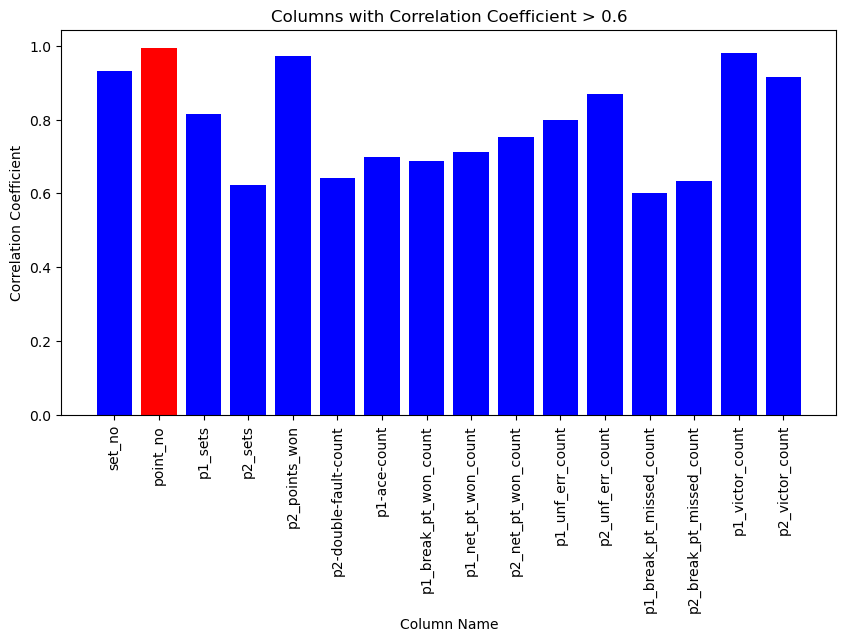

In [598]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code
int_columns = data_fun.select_dtypes(include='int' or 'float')
count_dict = {}
for i in int_columns.columns:
    m = int_columns[i].values
    n = (data_fun['p1_points_won']).values
    correlation_coefficient = np.corrcoef(m, n)[0, 1]
    if(correlation_coefficient > 0.6): 
        count_dict[i] = correlation_coefficient

# Remove 'p1_points_won' from the dictionary
if 'p1_points_won' in count_dict:
    del count_dict['p1_points_won']

# Find the column with the highest correlation coefficient
max_corr_column = max(count_dict, key=count_dict.get)

# Create a color list, with 'red' for the column with the highest correlation coefficient
colors = ['red' if column == max_corr_column else 'blue' for column in count_dict.keys()]

# Plotting the bar chart
plt.figure(figsize=(10, 5))
plt.bar(count_dict.keys(), count_dict.values(), color=colors)
plt.xlabel('Column Name')
plt.ylabel('Correlation Coefficient')
plt.title('Columns with Correlation Coefficient > 0.6')
plt.xticks(rotation=90)
plt.show()

In [599]:
# Assume df is your DataFrame and it has the necessary features
features = [
            'player1_consecutive_points_won',
            'player2_consecutive_points_won',
            'player1_consecutive_points_lost',
            'player2_consecutive_points_lost',
            'p1-ace-count',
            'p2-ace-count',
            'server',
            'p1_break_pt_won_count',
            'p2_break_pt_won_count',
            'p1_break_pt_missed_count',
            'p2_break_pt_missed_count',
            'p1_victor_count',
            'p2_victor_count',
            'p1-double-fault-count',
            'p2-double-fault-count'
            ]  # replace with your actual features
# target = 'next_three_points_winner'
# target = 'point_victor'

# 存放不同参数取值，以及对应的精度，每一个元素都是一个三元组(a, b, c)
results = []
# 最小叶子结点的参数取值
sample_leaf_options = list(range(1, 50, 3))
#sample_leaf_options = 100
# 决策树个数参数取值
n_estimators_options = list(range(1, 100, 5))
#n_estimators_options = 500



target = 'three_points_winner'

# 计算训练集的大小
train_size = int(len(data_fun) * 0.85)

# 按照顺序分割训练集和测试集
X_train = data_fun[features][:train_size]
X_test = data_fun[features][train_size:]
y_train = data_fun[target][:train_size]
y_test = data_fun[target][train_size:]


for leaf_size in sample_leaf_options:
    for n_estimators_size in n_estimators_options:
        alg = RandomForestClassifier(min_samples_leaf=leaf_size, n_estimators=n_estimators_size, random_state=50)
        alg.fit(X_train, y_train)
        predict = alg.predict(X_test)
        # 用一个三元组，分别记录当前的 min_samples_leaf，n_estimators， 和在测试数据集上的精度
        results.append((leaf_size, n_estimators_size, (y_test == predict).mean()))
        # 真实结果和预测结果进行比较，计算准确率
        print((y_test == predict).mean())

# 打印精度最大的那一个三元组
print(max(results, key=lambda x: x[2]))


# # Train model
# model = RandomForestClassifier(random_state=60)
# model.fit(X_train, y_train)

# # Predict probabilities for the test set
# df_test = X_test.copy()
# df_test['predicted_momentum_player1'] = model.predict_proba(X_test)[:, 0]  # get the probability of the positive class
# df_test['predicted_momentum_player2'] = 1 - df_test['predicted_momentum_player1']  # get the probability of the negative class



0.7557182067703568
0.7813357731015553
0.7767612076852699
0.7785910338517841
0.7868252516010978
0.7950594693504117
0.7941445562671546
0.797804208600183
0.7968892955169259
0.8005489478499542
0.7996340347666971
0.7941445562671546
0.7959743824336688
0.7950594693504117
0.7886550777676121
0.7859103385178408
0.787740164684355
0.7895699908508692
0.7932296431838975
0.7941445562671546
0.8023787740164684
0.8069533394327539
0.8060384263494969
0.807868252516011
0.807868252516011
0.8151875571820677
0.8142726440988106
0.8151875571820677
0.8133577310155535
0.818847209515096
0.8142726440988106
0.8142726440988106
0.8124428179322964
0.8142726440988106
0.8115279048490394
0.8115279048490394
0.8087831655992681
0.8087831655992681
0.8106129917657823
0.8106129917657823
0.8060384263494969
0.8005489478499542
0.8051235132662397
0.8087831655992681
0.8069533394327539
0.8051235132662397
0.807868252516011
0.807868252516011
0.8051235132662397
0.8032936870997255
0.8060384263494969
0.8042086001829826
0.8023787740164684


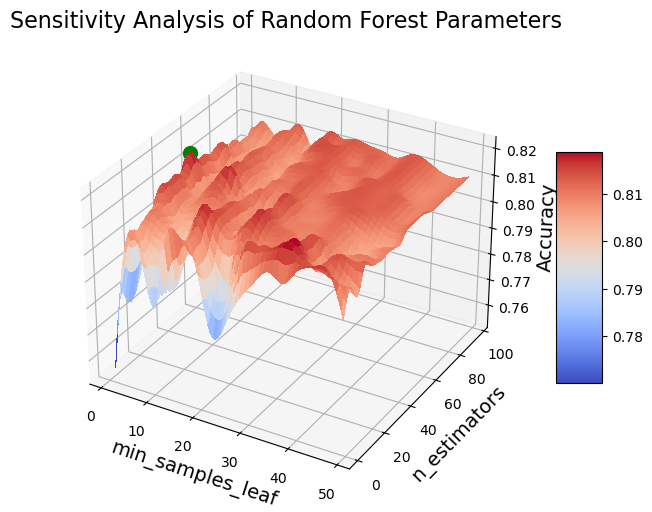

Maximum accuracy:  0.818847209515096
Minimum accuracy:  0.7557182067703568
Average accuracy:  0.8084360368117955
Best min_samples_leaf:  4
Best n_estimators:  46
Best accuracy:  0.818847209515096


In [600]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import numpy as np
import matplotlib.cm as cm
results = {(x[0], x[1]): x[2] for x in results}
# Convert the keys of the dictionary to a list
keys = list(results.keys())

# Separate the first and second parameter values and the accuracy scores
x = [key[0] for key in keys]
y = [key[1] for key in keys]
z = list(results.values())

# Create a grid of parameter values
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the accuracy scores
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a color map
surf = ax.plot_surface(xi, yi, zi, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Find the parameters of the maximum accuracy
max_accuracy_index = np.argmax(z)
max_accuracy_x = x[max_accuracy_index]
max_accuracy_y = y[max_accuracy_index]

# Plot the point of maximum accuracy with a larger size
ax.scatter(max_accuracy_x, max_accuracy_y, max(z), color='green', s=100)

# Set the labels with larger font sizes
ax.set_xlabel('min_samples_leaf', fontsize=14)
ax.set_ylabel('n_estimators', fontsize=14)
ax.set_zlabel('Accuracy', fontsize=14)

# Set the title
ax.set_title('Sensitivity Analysis of Random Forest Parameters', fontsize=16)

# Show the plot
plt.show()

# Calculate the maximum, minimum and average accuracy
max_accuracy = max(z)
min_accuracy = min(z)
avg_accuracy = sum(z) / len(z)

# Print the maximum, minimum and average accuracy
print("Maximum accuracy: ", max_accuracy)
print("Minimum accuracy: ", min_accuracy)
print("Average accuracy: ", avg_accuracy)

# Print the best parameters and accuracy
print("Best min_samples_leaf: ", max_accuracy_x)
print("Best n_estimators: ", max_accuracy_y)
print("Best accuracy: ", max_accuracy)

In [601]:
import pandas as pd

# Create a DataFrame with the data
data = {
    'Metric': ['Maximum accuracy', 'Minimum accuracy', 'Average accuracy', 'Best min_samples_leaf', 'Best n_estimators', 'Best accuracy'],
    'Value': [max_accuracy, min_accuracy, avg_accuracy, max_accuracy_x, max_accuracy_y, max_accuracy]
}
df = pd.DataFrame(data)

# Set the index to 'Metric'
df.set_index('Metric', inplace=True)

# Use the Styler object to add a title and improve the appearance
styled_df = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

# Add a title
styled_df.set_caption('Sensitivity Analysis Results')

# Display the styled DataFrame
styled_df

,Value
Metric,
Maximum accuracy,0.818847
Minimum accuracy,0.755718
Average accuracy,0.808436
Best min_samples_leaf,4.000000
Best n_estimators,46.000000
Best accuracy,0.818847


In [ ]:
\begin{figure}[H] 
      \centering 
      \includegraphics[width=0.7\textwidth]{output6.png} 
      \caption{Correlation degree analysis} 
      \label{Correlation degree analysis} 
  \end{figure}

In [602]:
# Train model
model = RandomForestClassifier(min_samples_leaf=4, n_estimators=46, random_state=50)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=46, random_state=50)

In [603]:
# Predict probabilities for the test set
df_test = X_test.copy()
df_test['predicted_momentum_player1'] = model.predict_proba(X_test)[:, 0]  # get the probability of the positive class
df_test['predicted_momentum_player2'] = 1 - df_test['predicted_momentum_player1']  # get the probability of the negative class

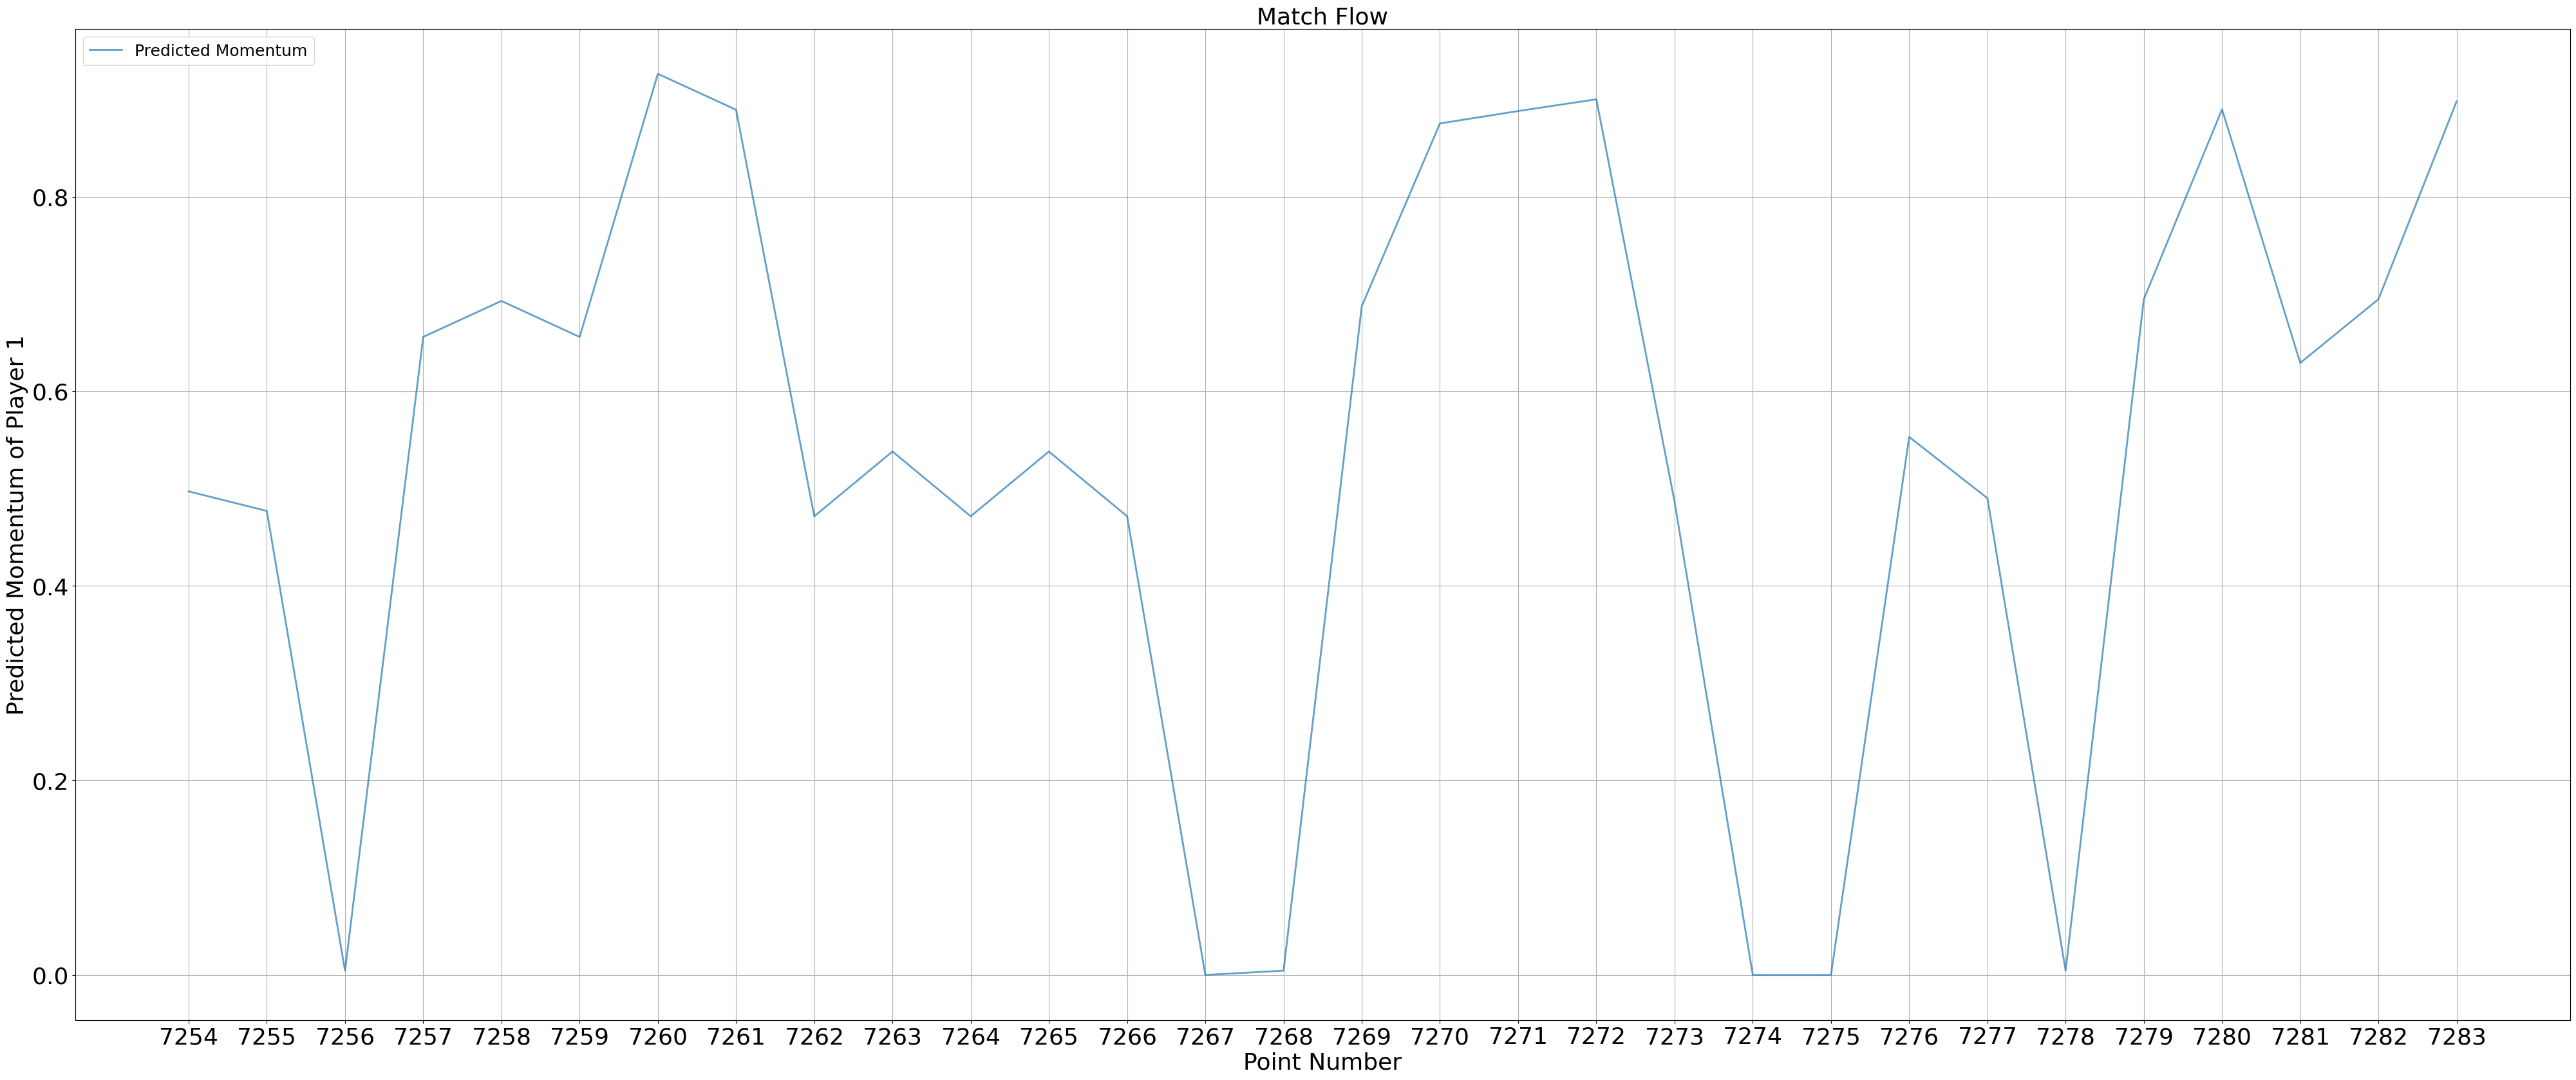

In [604]:

plt.figure(figsize=(50,20))

# Plot with a thicker line and make it a bit transparent
plt.plot(df_test.tail(30).index, df_test.tail(30)['predicted_momentum_player1'], linewidth=2, alpha=0.7, label='Predicted Momentum')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Predicted Momentum of Player 1', fontsize=26)  # Increase fontsize
plt.title('Match Flow', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(df_test.tail(30).index.min(), df_test.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Add a legend
plt.legend(loc='upper left', fontsize=18)  # Increase fontsize

plt.show()

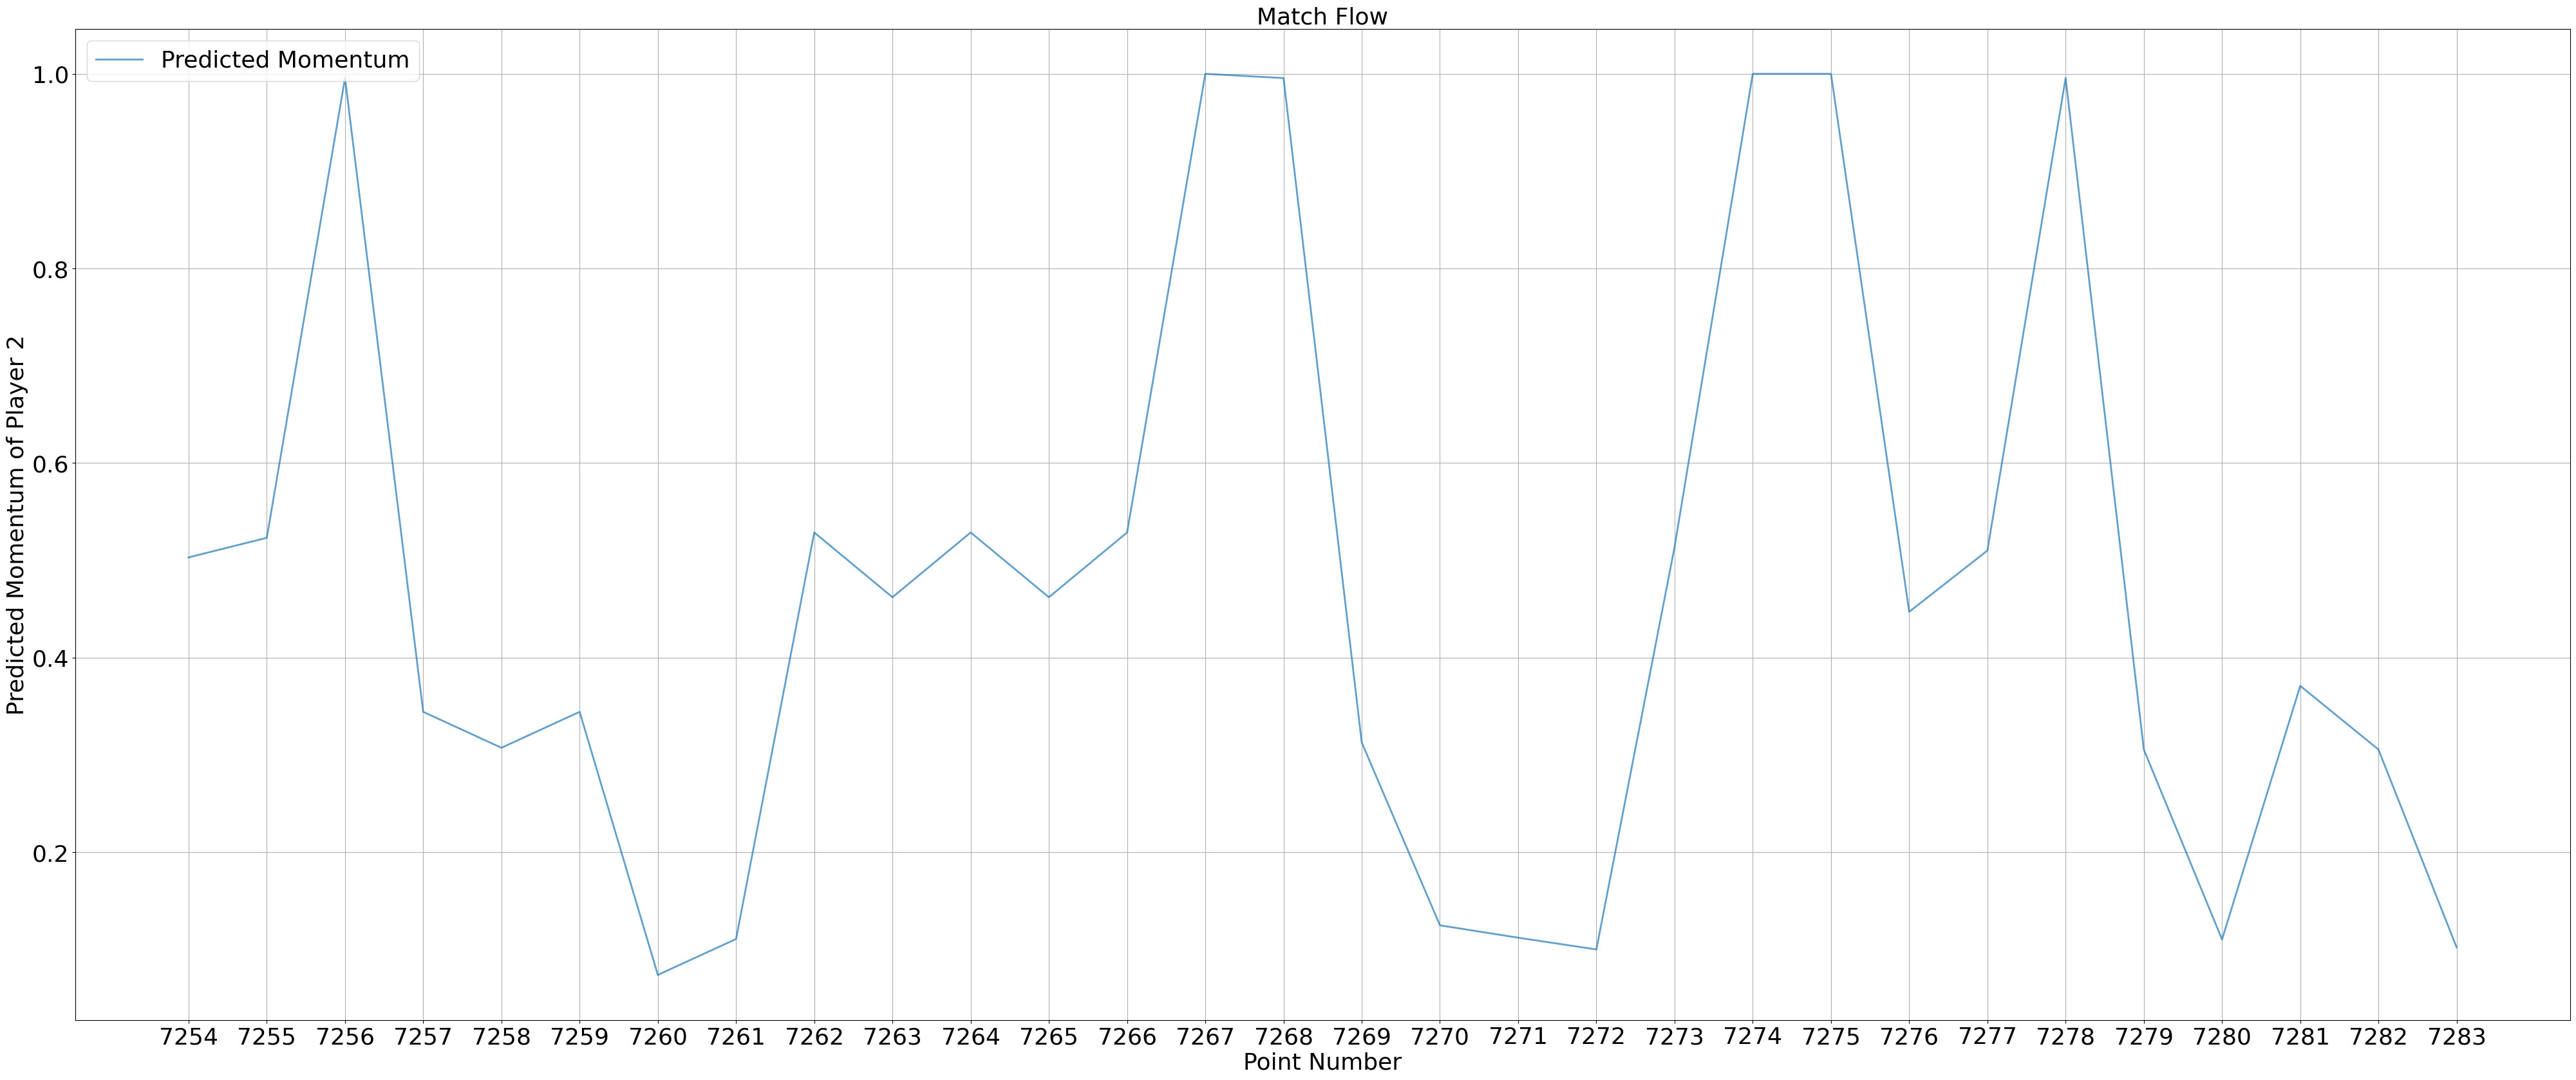

In [605]:
plt.figure(figsize=(50,20))

# Plot with a thicker line and make it a bit transparent
plt.plot(df_test.tail(30).index, df_test.tail(30)['predicted_momentum_player2'], linewidth=2, alpha=0.7, label='Predicted Momentum')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Predicted Momentum of Player 2', fontsize=26)  # Increase fontsize
plt.title('Match Flow', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(df_test.tail(30).index.min(), df_test.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Add a legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

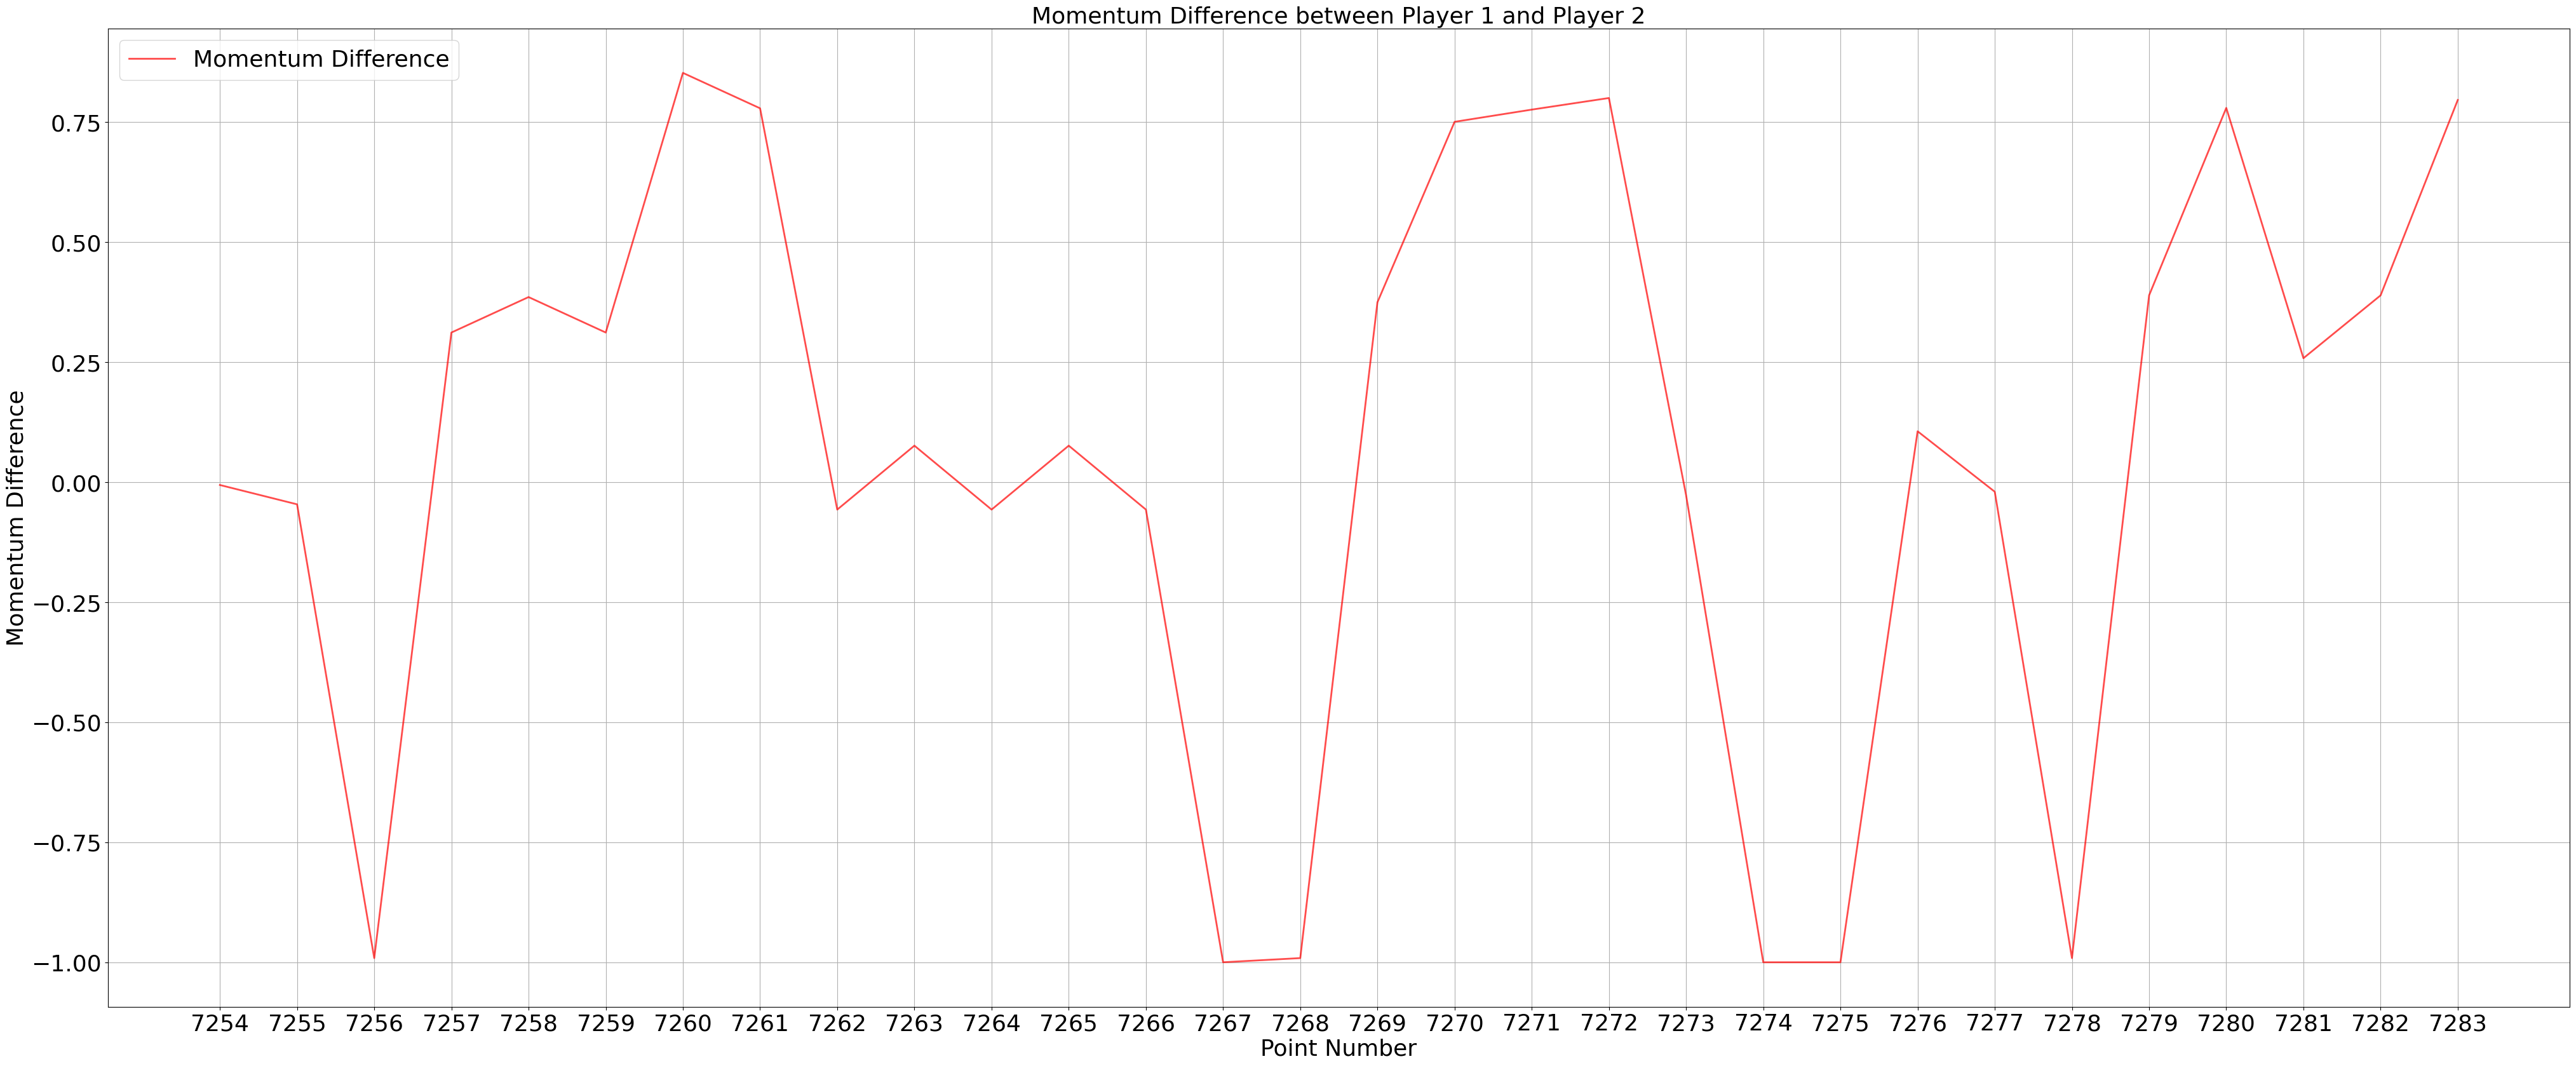

In [606]:
# Calculate the percentage difference between player1's momentum and player2's momentum
df_test['momentum_diff'] = (df_test['predicted_momentum_player1'] - df_test['predicted_momentum_player2']) 

plt.figure(figsize=(50,20))

# Plot the percentage difference
plt.plot(df_test.tail(30).index, df_test.tail(30)['momentum_diff'], linewidth=2, alpha=0.7, label='Momentum Difference',color='red')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Momentum Difference', fontsize=26)  # Increase fontsize
plt.title('Momentum Difference between Player 1 and Player 2', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(df_test.tail(30).index.min(), df_test.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Add a legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

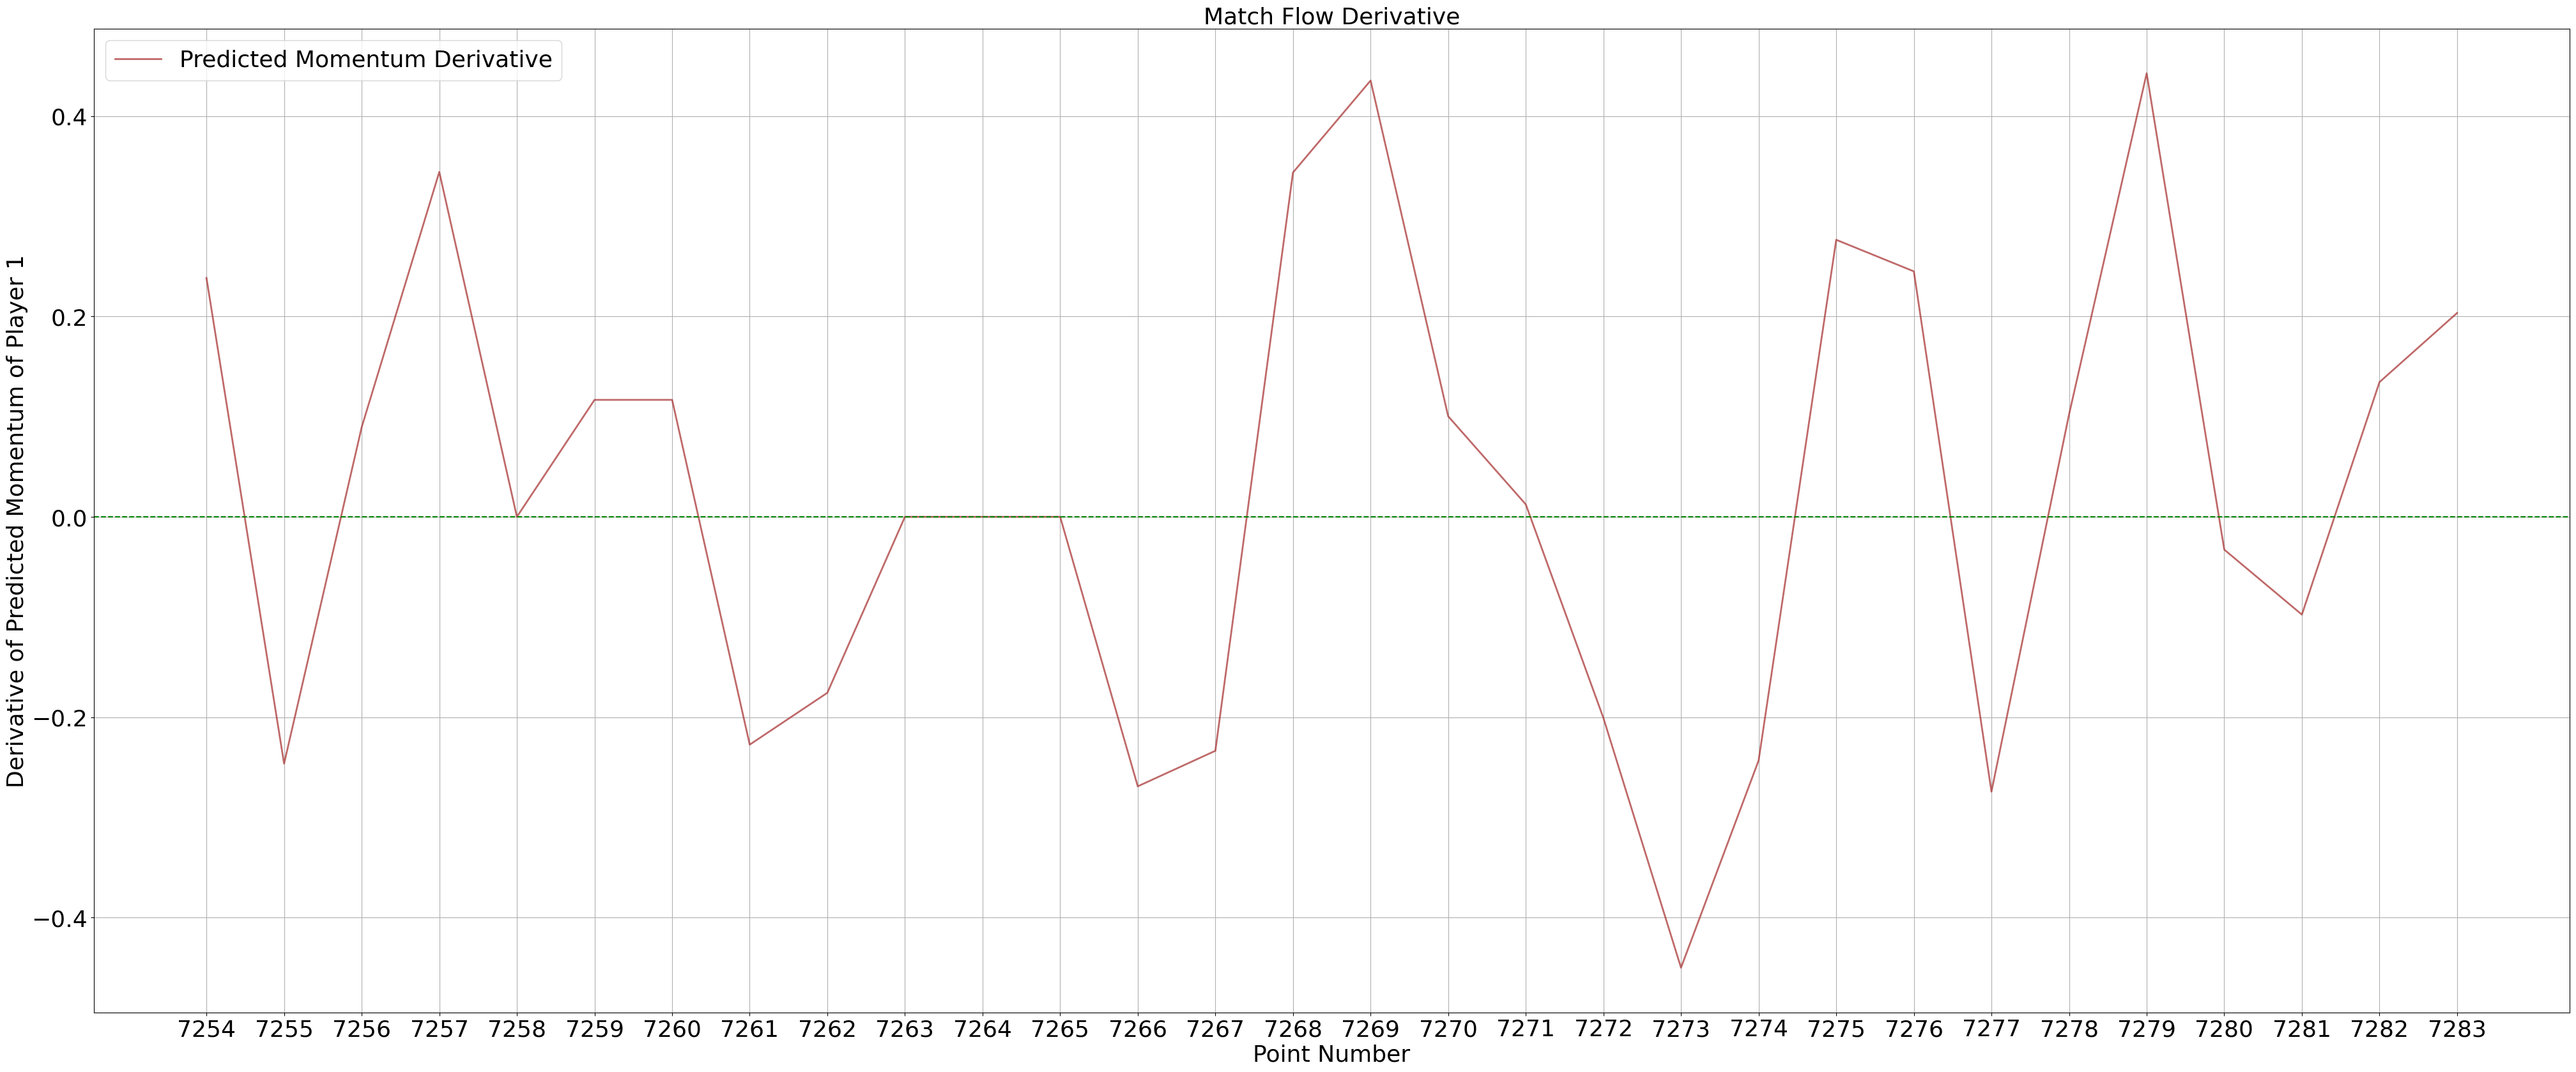

In [607]:
# Calculate the first derivative
df_test['predicted_momentum_player1_derivative'] = np.gradient(df_test['predicted_momentum_player1'])

plt.figure(figsize=(50,20))
plt.plot(df_test.tail(30).index, df_test.tail(30)['predicted_momentum_player1_derivative'], linewidth=2, alpha=0.7, label='Predicted Momentum Derivative',color='brown')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Derivative of Predicted Momentum of Player 1', fontsize=26)  # Increase fontsize
plt.title('Match Flow Derivative', fontsize=26)  # Increase fontsize

# Draw a horizontal line at y=0
plt.axhline(y=0, color='green', linestyle='--')

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(df_test.tail(30).index.min(), df_test.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Add a legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

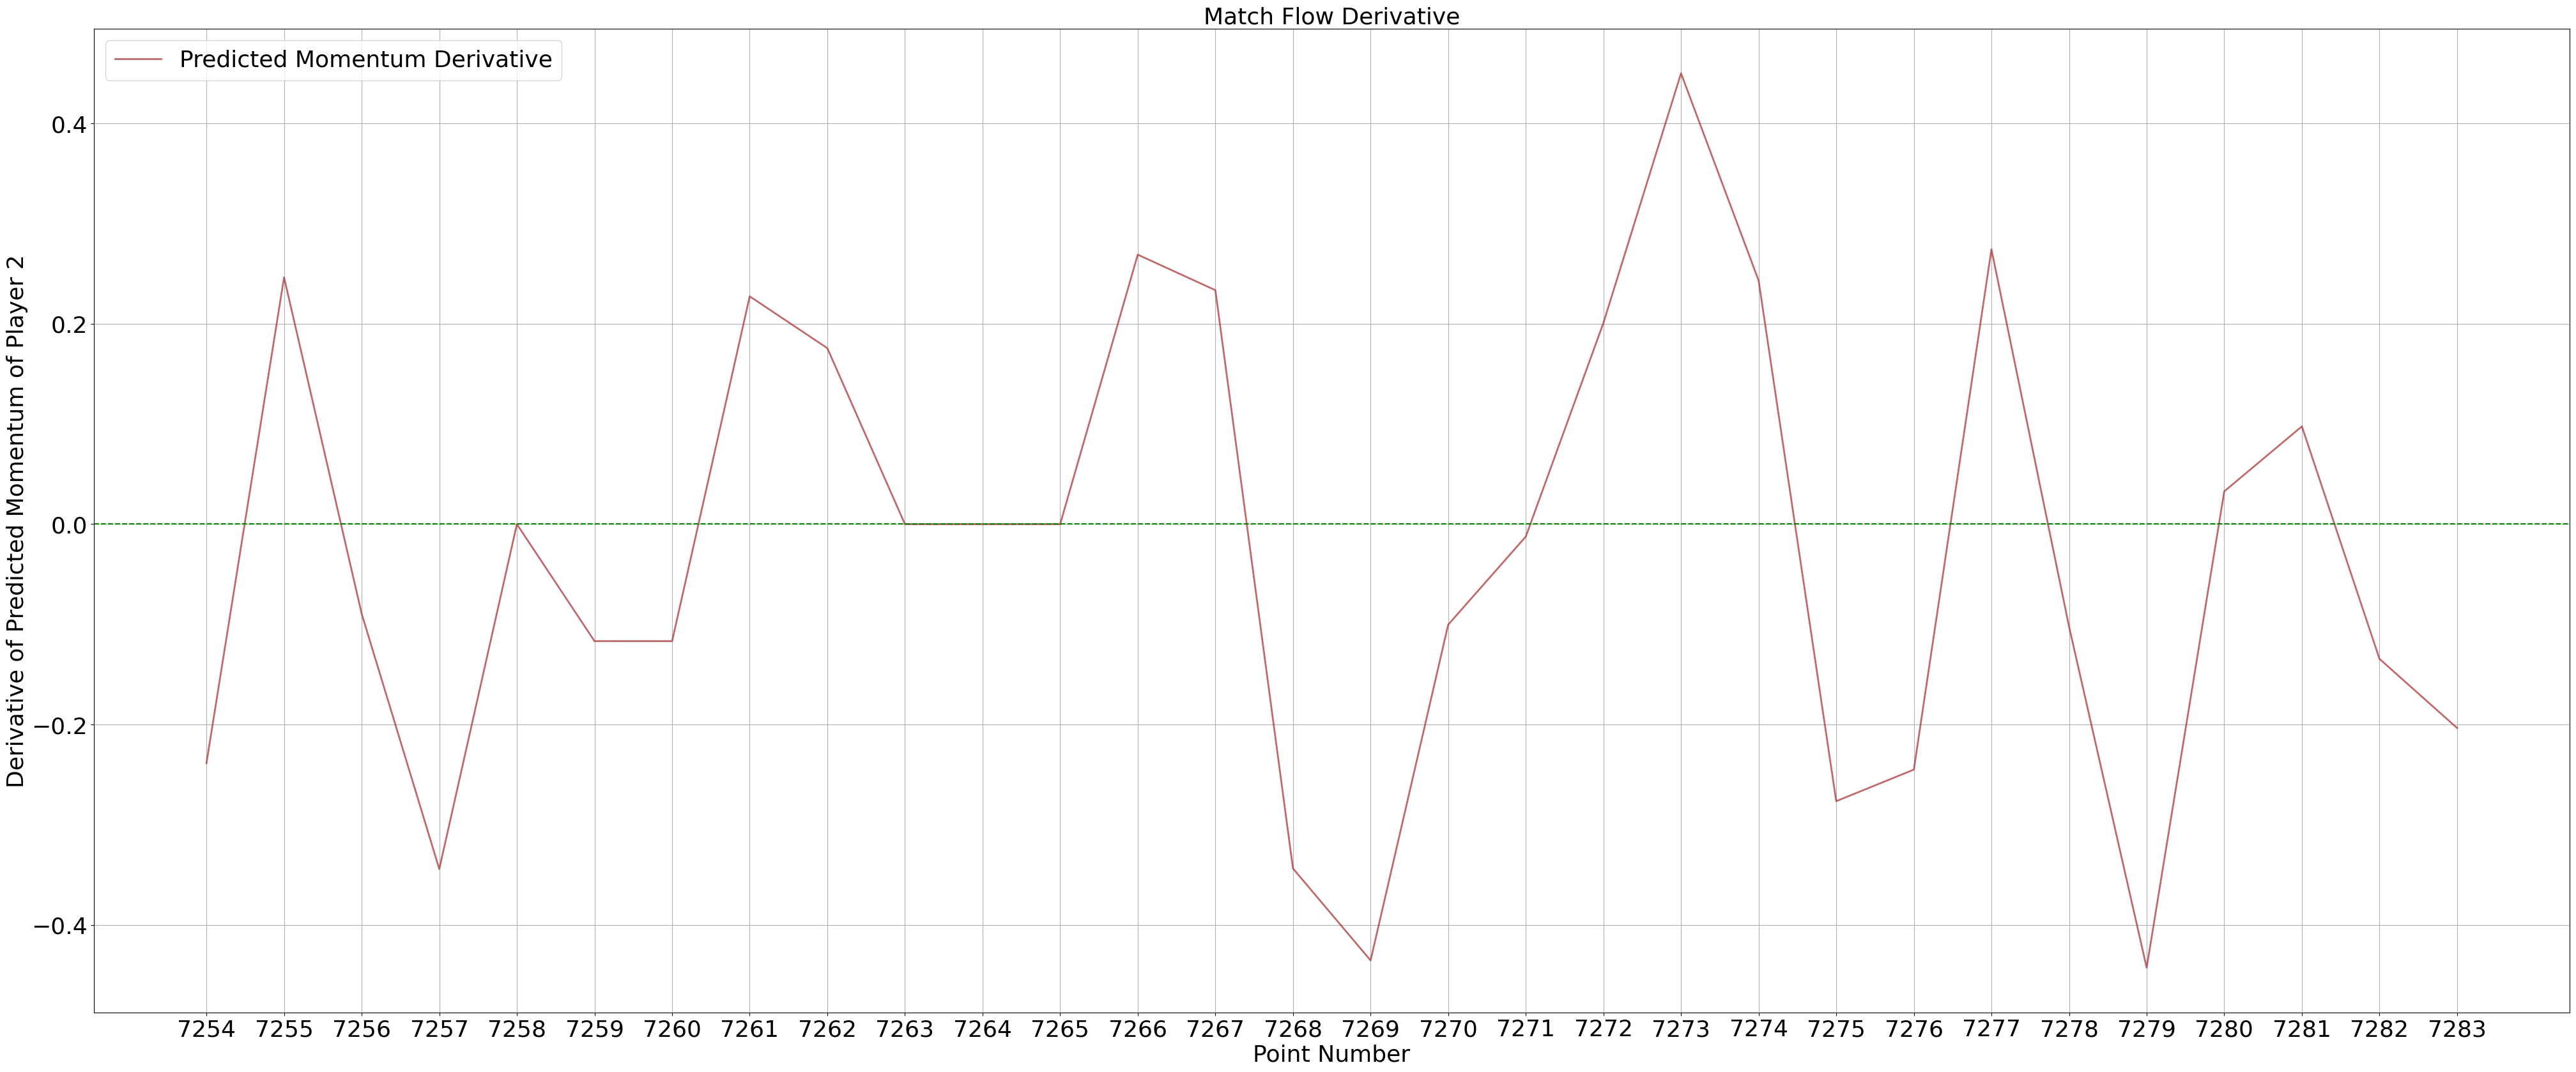

In [608]:
# Calculate the first derivative
df_test['predicted_momentum_player2_derivative'] = np.gradient(df_test['predicted_momentum_player2'])

plt.figure(figsize=(50,20))
plt.plot(df_test.tail(30).index, df_test.tail(30)['predicted_momentum_player2_derivative'], linewidth=2, alpha=0.7, label='Predicted Momentum Derivative',color='brown')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Derivative of Predicted Momentum of Player 2', fontsize=26)  # Increase fontsize
plt.title('Match Flow Derivative', fontsize=26)  # Increase fontsize

# Draw a horizontal line at y=0
plt.axhline(y=0, color='green', linestyle='--')

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(df_test.tail(30).index.min(), df_test.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Add a legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

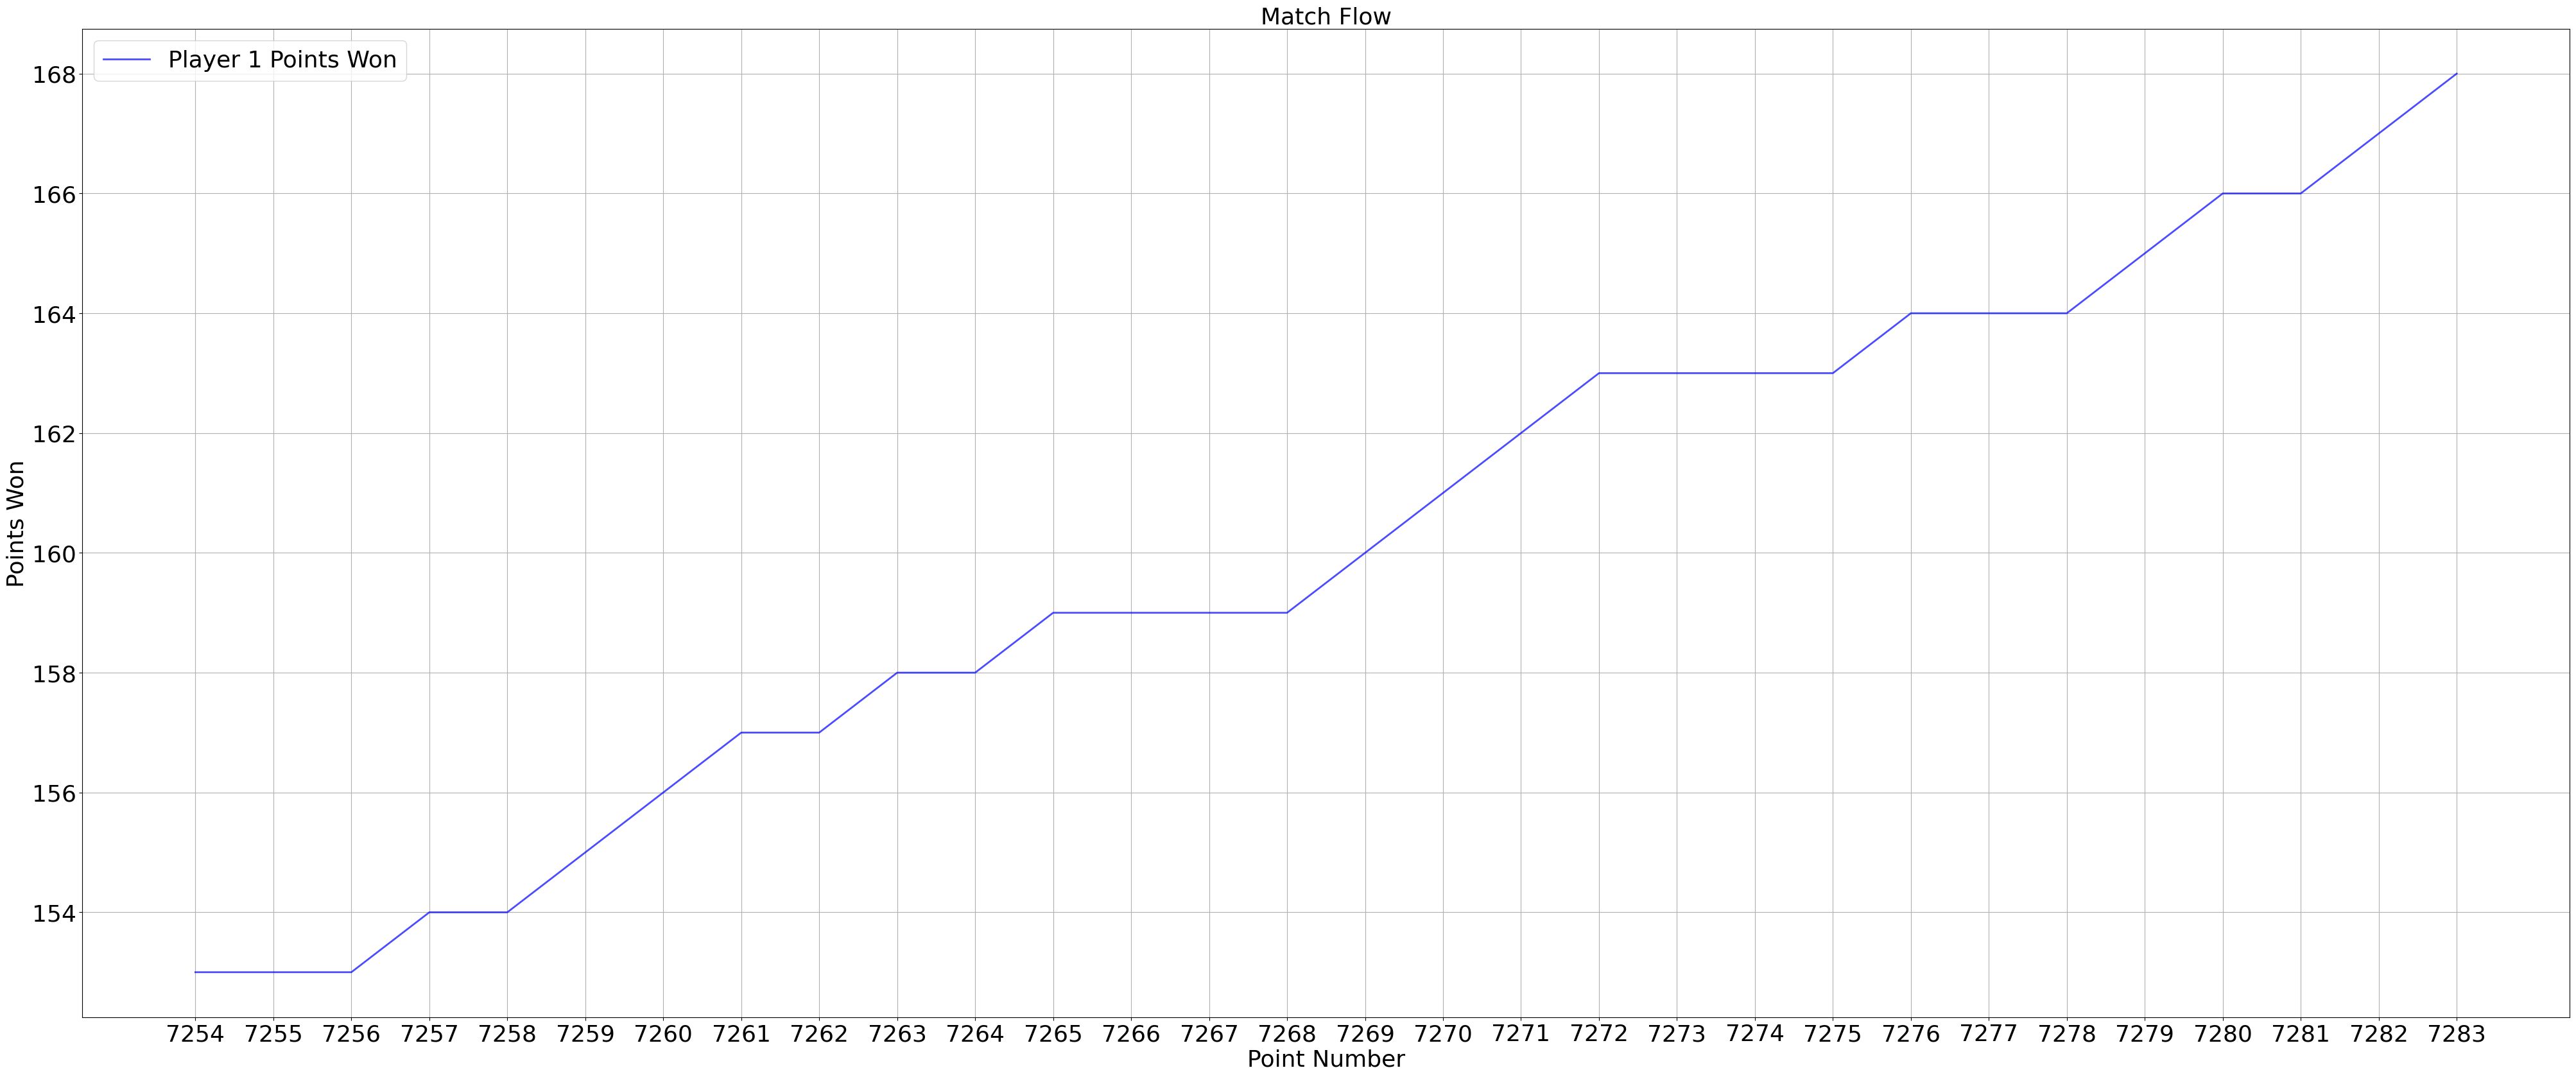

In [609]:
plt.figure(figsize=(50,20))

# Plot p1_points_won with blue color
plt.plot(data_fun.tail(30).index, data_fun.tail(30)['p1_points_won'], color='blue', linewidth=2, alpha=0.7, label='Player 1 Points Won')

# Plot p2_points_won with red color
#plt.plot(data_fun.tail(100).index, data_fun.tail(100)['p2_points_won'], color='red', linewidth=2, alpha=0.7, label='Player 2 Points Won')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Points Won', fontsize=26)  # Increase fontsize
plt.title('Match Flow', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(data_fun.tail(30).index.min(), data_fun.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Show legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

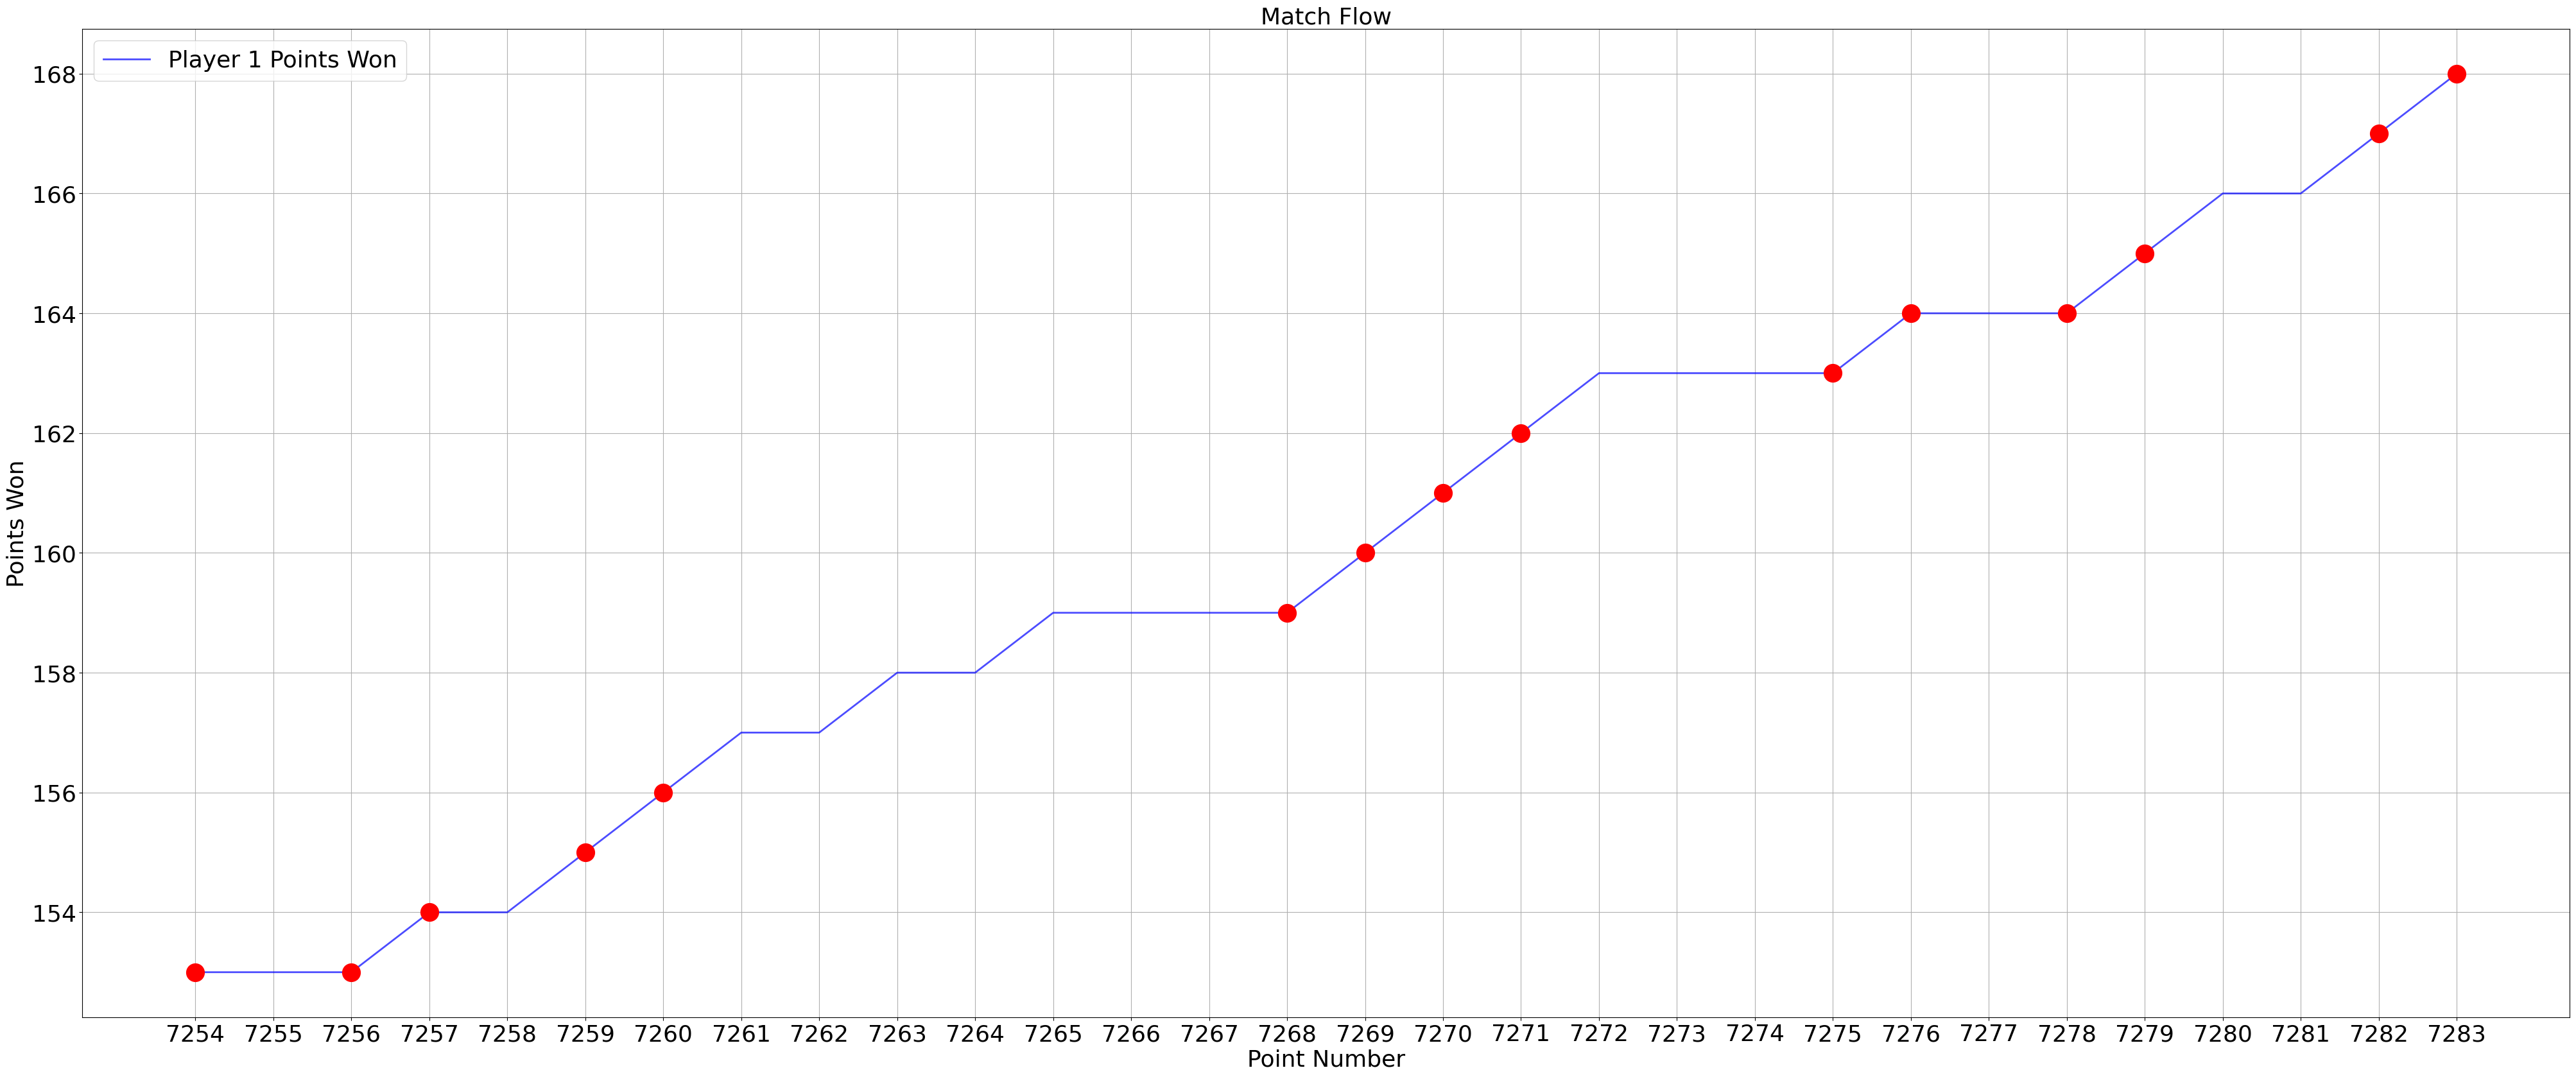

In [610]:
# Find the points number where derivative is greater than 0
positive_derivative_points = df_test[df_test['predicted_momentum_player1_derivative'] > 0].index

plt.figure(figsize=(50,20))

# Plot p1_points_won with blue color
plt.plot(data_fun.tail(30).index, data_fun.tail(30)['p1_points_won'], color='blue', linewidth=2, alpha=0.7, label='Player 1 Points Won')

# Mark the points where derivative is greater than 0 with red color and larger size
for point in positive_derivative_points:
    if point in data_fun.tail(30).index:
        plt.plot(point, data_fun.loc[point, 'p1_points_won'], marker='o', markersize=20, color="red")  # Increase markersize

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Points Won', fontsize=26)  # Increase fontsize
plt.title('Match Flow', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(data_fun.tail(30).index.min(), data_fun.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Show legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

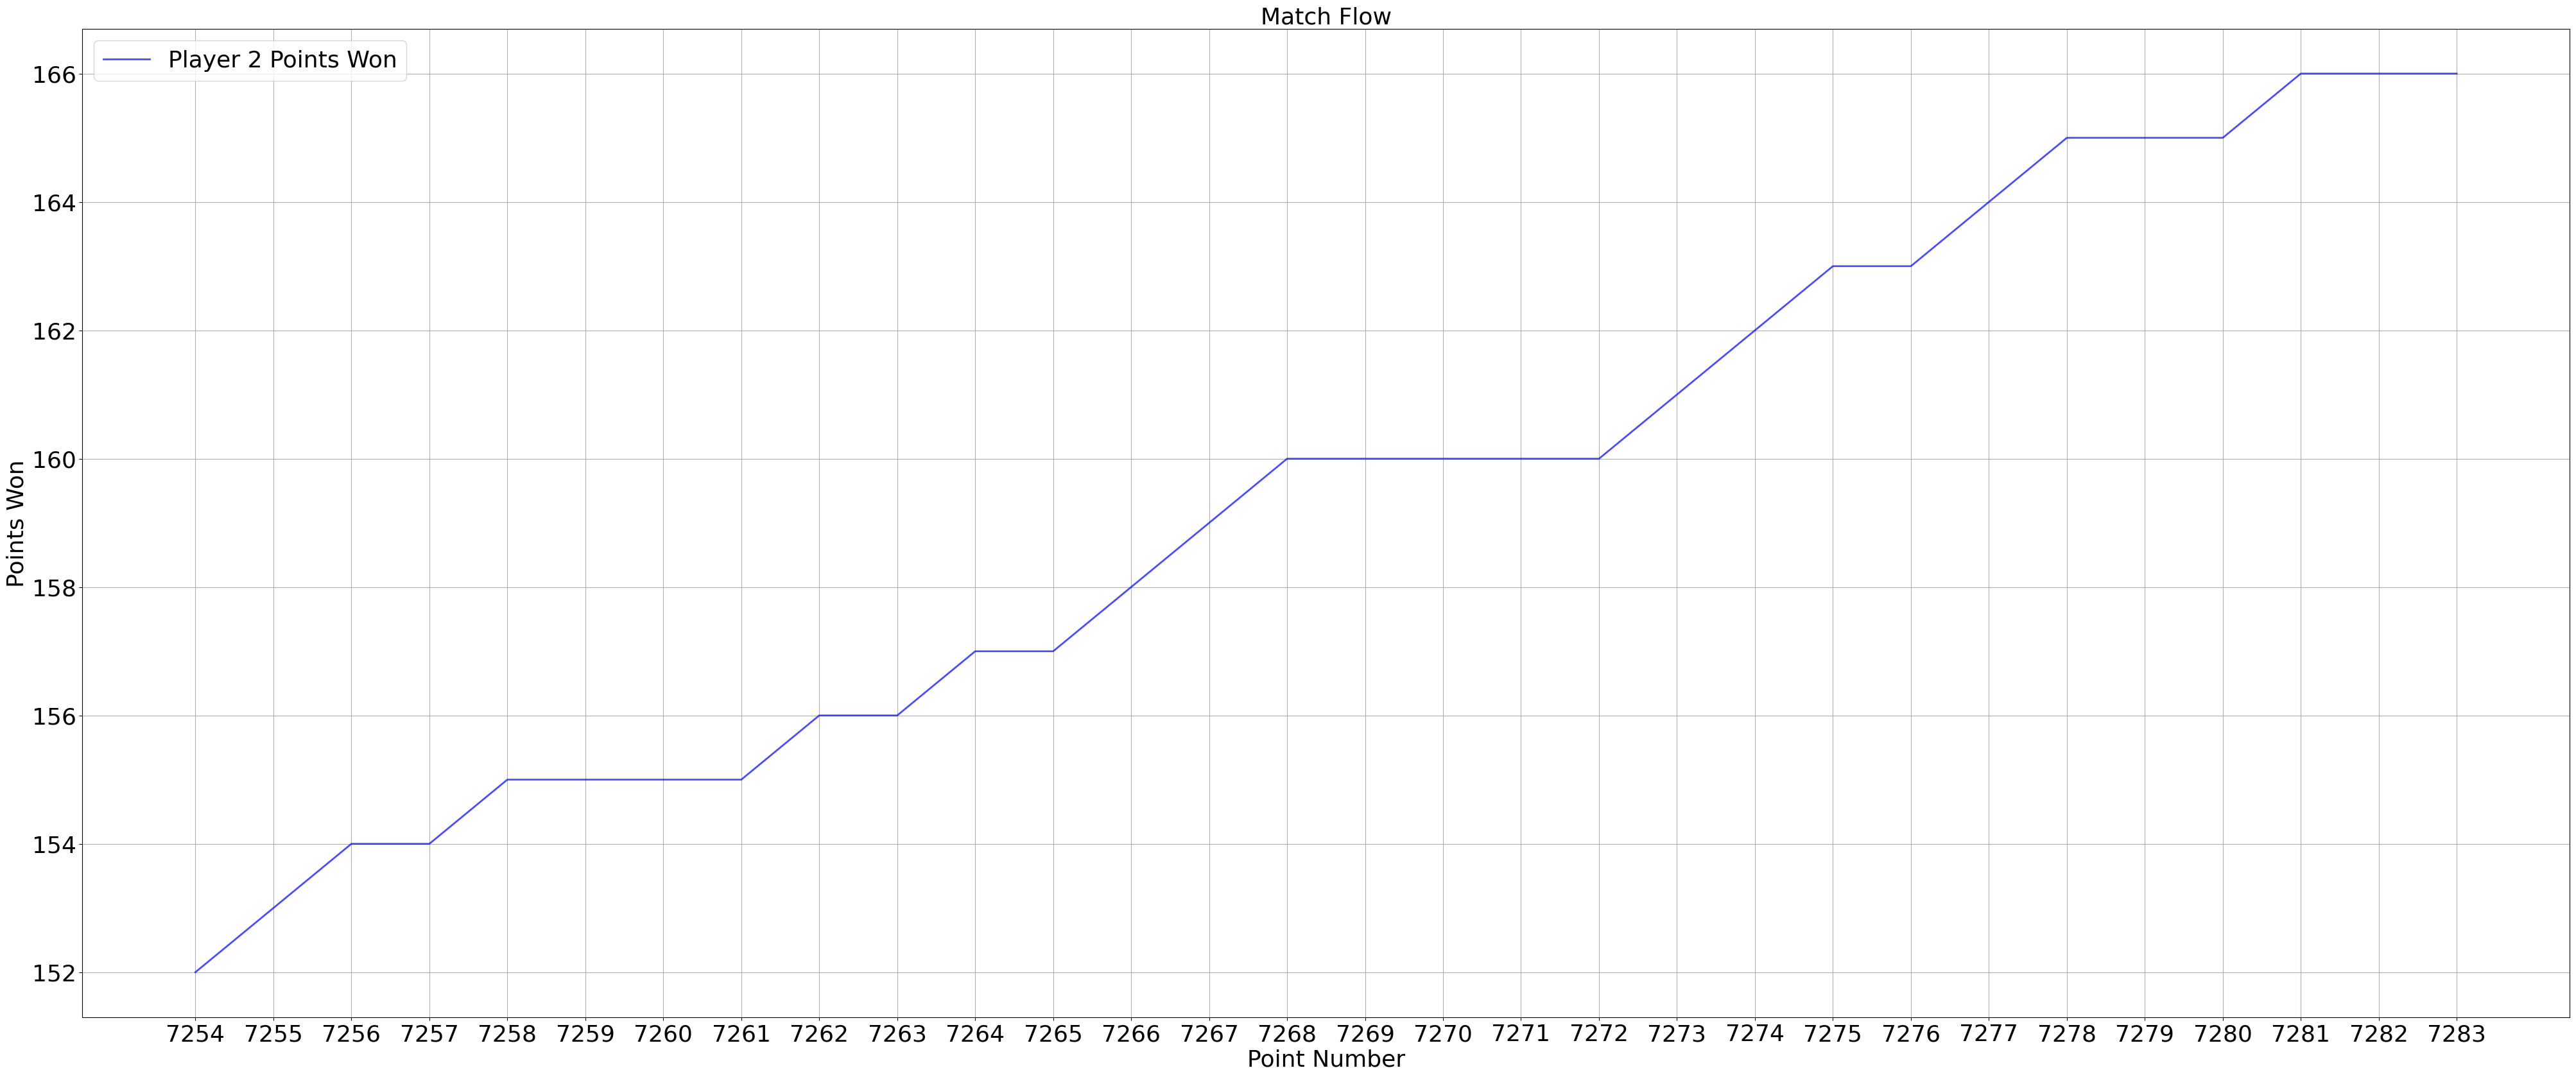

In [611]:
plt.figure(figsize=(50,20))

# Plot p2_points_won with blue color
plt.plot(data_fun.tail(30).index, data_fun.tail(30)['p2_points_won'], color='blue', linewidth=2, alpha=0.7, label='Player 2 Points Won')

# Plot p2_points_won with red color
#plt.plot(data_fun.tail(100).index, data_fun.tail(100)['p2_points_won'], color='red', linewidth=2, alpha=0.7, label='Player 2 Points Won')

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Points Won', fontsize=26)  # Increase fontsize
plt.title('Match Flow', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(data_fun.tail(30).index.min(), data_fun.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Show legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

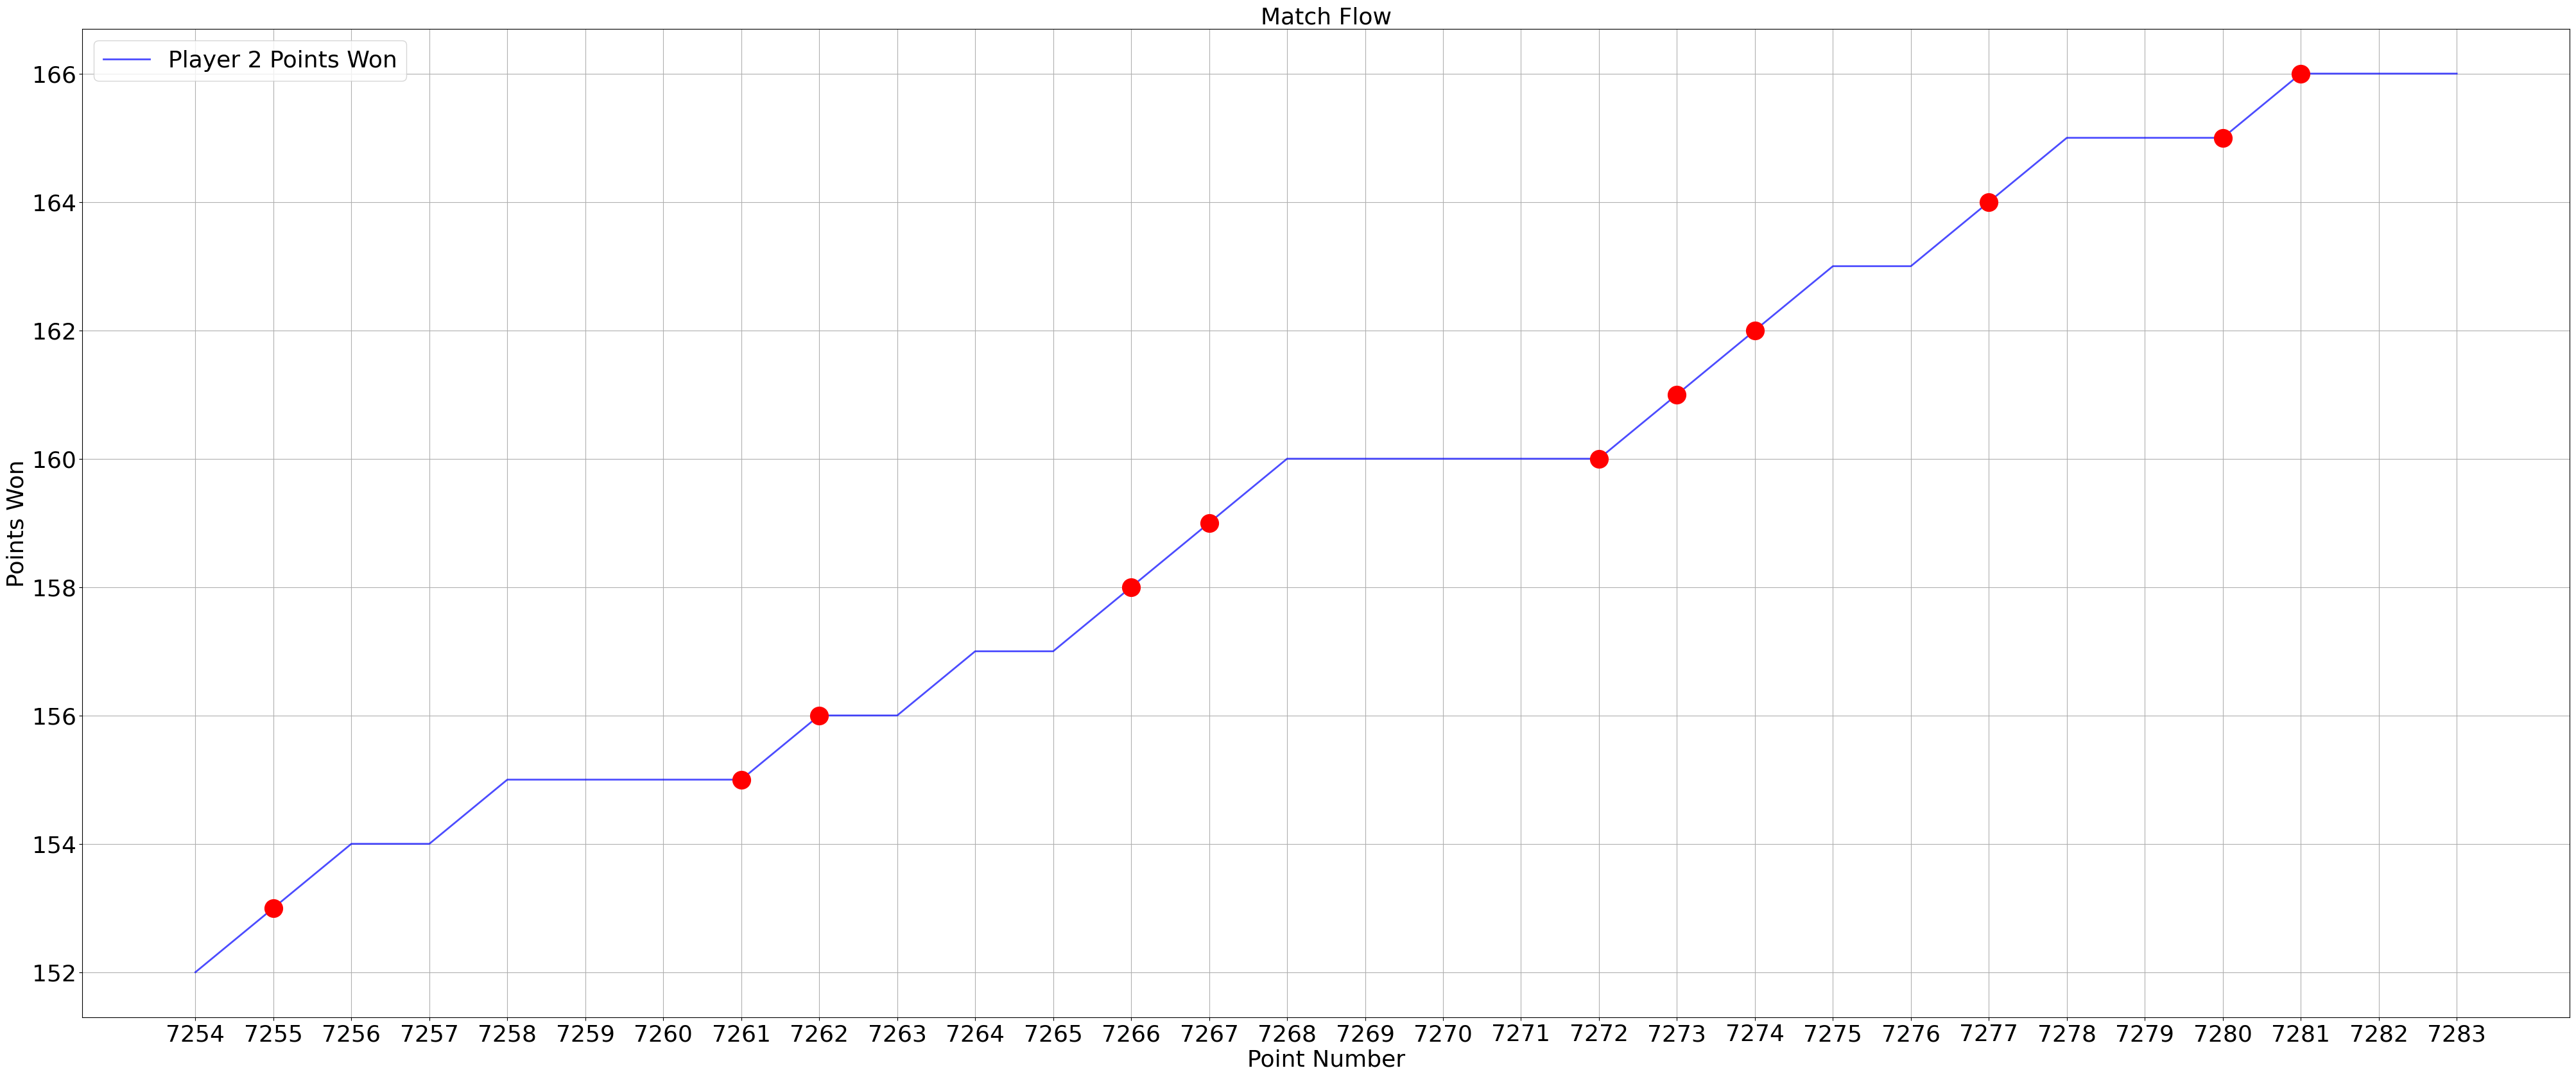

In [612]:
# Find the points number where derivative is greater than 0
positive_derivative_points = df_test[df_test['predicted_momentum_player2_derivative'] > 0].index

plt.figure(figsize=(50,20))

# Plot p1_points_won with blue color
plt.plot(data_fun.tail(30).index, data_fun.tail(30)['p2_points_won'], color='blue', linewidth=2, alpha=0.7, label='Player 2 Points Won')

# Mark the points where derivative is greater than 0 with red color and larger size
for point in positive_derivative_points:
    if point in data_fun.tail(30).index:
        plt.plot(point, data_fun.loc[point, 'p2_points_won'], marker='o', markersize=20, color="red")  # Increase markersize

plt.xlabel('Point Number', fontsize=26)  # Increase fontsize
plt.ylabel('Points Won', fontsize=26)  # Increase fontsize
plt.title('Match Flow', fontsize=26)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(np.arange(data_fun.tail(30).index.min(), data_fun.tail(30).index.max()+1, 1), fontsize=26)  # Increase fontsize
plt.yticks(fontsize=26)  # Increase fontsize

# Show legend
plt.legend(loc='upper left', fontsize=26)  # Increase fontsize

plt.show()

In [613]:
data_fun2 = data_fun.loc[df_test.index]

In [614]:
# Ensure that 'data_fun' and 'df_test' have the same index
assert data_fun2.index.equals(df_test.index), "Indexes are not the same"

# Join 'p1_points_won' column from 'data_fun' to 'df_test'
df_test = df_test.join(data_fun2['p1_points_won'])
df_test = df_test.join(data_fun2['p2_points_won'])

test_size=300

In [615]:
# Calculate the difference of 'p1_points_won' to get the 'rise' of 'p1_points_won'
df_test['p1_points_won_rise'] = df_test['p1_points_won'].diff() > 0

# Find the moments when 'predicted_momentum_derivative' is positive
positive_derivative_moments = df_test['predicted_momentum_player1_derivative'] >0

#Calculate the accuracy
accuracy = df_test.tail(test_size).loc[positive_derivative_moments, 'p1_points_won_rise'].mean()

print('Accuracy:', accuracy)

Accuracy: 0.696969696969697


In [616]:
# Calculate the difference of 'p1_points_won' to get the 'rise' of 'p1_points_won'
df_test['p2_points_won_rise'] = df_test['p2_points_won'].diff() > 0

# Find the moments when 'predicted_momentum_derivative' is positive
positive_derivative_moments = df_test['predicted_momentum_player2_derivative'] > 0

#Calculate the accuracy
accuracy = df_test.tail(test_size).loc[positive_derivative_moments, 'p2_points_won_rise'].mean()

print('Accuracy:', accuracy)

Accuracy: 0.631578947368421


p_value<0.05, which means that there is strong evidence against the null hypothesis, so you reject the null hypothesis.

In [617]:
from scipy.stats import ttest_ind

# 找到predicted_momentum_player1_derivative为正的时刻
positive_derivative_moments = df_test['predicted_momentum_player1_derivative'].tail(test_size) > 0

# 找到predicted_momentum_player1_derivative为负的时刻
negative_derivative_moments = df_test['predicted_momentum_player1_derivative'].tail(test_size) < 0

# 获取这两种情况下的p1_points_won的上升情况
p1_points_won_rise_positive_derivative = df_test.tail(test_size).loc[positive_derivative_moments, 'p1_points_won_rise']
p1_points_won_rise_negative_derivative = df_test.tail(test_size).loc[negative_derivative_moments, 'p1_points_won_rise']

# 执行独立样本p检验
p_value = ttest_ind(p1_points_won_rise_positive_derivative, p1_points_won_rise_negative_derivative)[1]


print('p value:', p_value)

p value: 4.0697532445592754e-08


In [620]:
import pandas as pd

# Your existing code
from scipy.stats import ttest_ind

positive_derivative_moments = df_test['predicted_momentum_player1_derivative'].tail(test_size) > 0
negative_derivative_moments = df_test['predicted_momentum_player1_derivative'].tail(test_size) < 0

p1_points_won_rise_positive_derivative = df_test.tail(test_size).loc[positive_derivative_moments, 'p1_points_won_rise']
p1_points_won_rise_negative_derivative = df_test.tail(test_size).loc[negative_derivative_moments, 'p1_points_won_rise']

p_value = ttest_ind(p1_points_won_rise_positive_derivative, p1_points_won_rise_negative_derivative)[1]

# Create a DataFrame to display the p-value
df_p_value = pd.DataFrame([p_value], columns=['p_value'])

print(df_p_value)

        p_value
0  4.069753e-08


In [618]:
##Final Match analysis

# Create a new DataFrame for the shifted values
df_shifted_up = df_test['predicted_momentum_player1_derivative'].shift(-1)
df_shifted_down = df_test['predicted_momentum_player1_derivative'].shift(1)

# Select rows where last value is less than 0 and the next value is greater than 0
df_selected_player1 = df_test[(df_shifted_down < 0) & (df_shifted_up > 0)]
df_selected_player1 = df_selected_player1.reset_index(drop=True)
df_selected_player1 = df_selected_player1.tail(51)
df_selected_player1 = df_selected_player1.drop(['predicted_momentum_player1',
                                                'predicted_momentum_player2',
                                                'predicted_momentum_player1_derivative',
                                                'predicted_momentum_player2_derivative',
                                                'p1_points_won',
                                                'p2_points_won',
                                                'p1_victor_count',
                                                'p2_victor_count',
                                                
                                                ], axis=1)

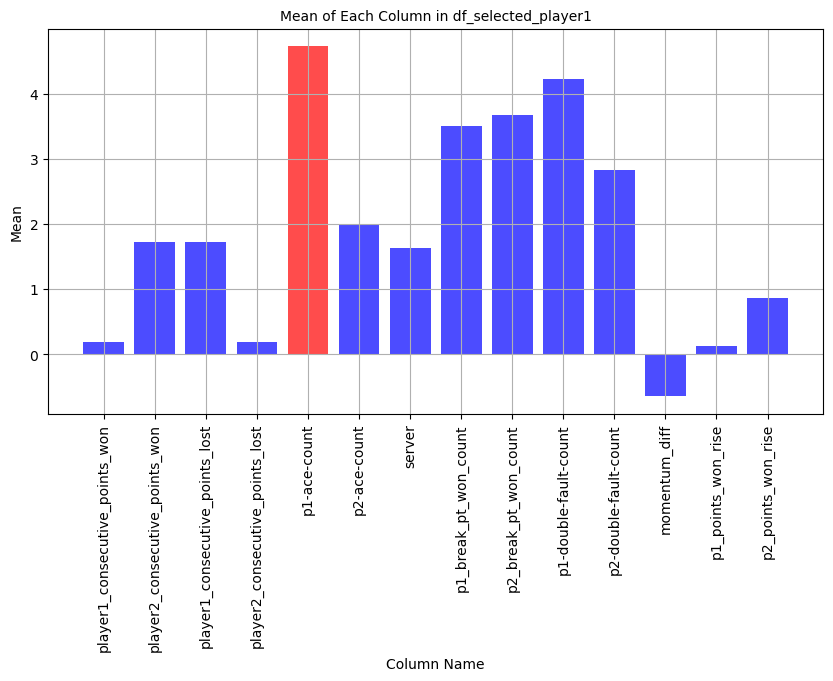

In [619]:
import matplotlib.pyplot as plt

# Drop the specified columns
df_selected_player1 = df_selected_player1.drop(['p1_break_pt_missed_count', 'p2_break_pt_missed_count'], axis=1)

# Calculate the mean of each column
column_mean = df_selected_player1.mean()

# Find the index of the maximum mean
max_mean_index = column_mean.idxmax()

# Create the bar chart
plt.figure(figsize=(10, 5))

# Plot each bar with color based on whether it's the maximum mean
for i, col in enumerate(column_mean.index):
    color = 'red' if col == max_mean_index else 'blue'
    plt.bar(col, column_mean[col], color=color, alpha=0.7)

plt.xlabel('Column Name', fontsize=10)  # Increase fontsize
plt.ylabel('Mean', fontsize=10)  # Increase fontsize
plt.title('Mean of Each Column in df_selected_player1', fontsize=10)  # Increase fontsize

# Add a grid
plt.grid(True)

# Set xticks
plt.xticks(rotation=90, fontsize=10)  # Increase fontsize
plt.yticks(fontsize=10)  # Increase fontsize

plt.show()

##最后一场比赛分析
First, all data from the last match is selected, and the upward and downward shifts of the 'predicted_momentum_player1_derivative' column are created. Then, rows where the previous value is less than 0 and the next value is greater than 0 are selected, in order to find the turning points of 'predicted_momentum_player1'. Finally, it calculates the average value of each feature and creates a bar chart to display these averages. This can effectively show which features play a larger role when 'predicted_momentum_player1' turns.